<a href="https://colab.research.google.com/github/gennadygorin/seq-cme-technoise/blob/dev/gg220406_refactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov chains for length bias quantification in scRNA-seq: a Colab demonstration

slowly but surely


In [1]:

# import collections
import numpy as np
# import sklearn
# import warnings
# import matplotlib.pyplot as plt
# import csv

In [2]:
dataset_names = ['brain_5k_v3','brain_nuc_5k_v3'] \
                +['brain_10x_30k_{:.0f}'.format(i) for i in range(1,5)] \
                +['brain_nuc_10x_30k_{:.0f}'.format(i) for i in range(1,5)] 
loom_filepaths = ['/home/ggorin/count_data/loom_10x_kb/'+x+'.loom' for x in dataset_names] 

transcriptome_filepath = './polyA_ref/gg_200524_mouse_genome_polyA_cum_1'
attribute_names=['spliced','unspliced','gene_name','barcode']

In [3]:
dataset_names

['brain_5k_v3',
 'brain_nuc_5k_v3',
 'brain_10x_30k_1',
 'brain_10x_30k_2',
 'brain_10x_30k_3',
 'brain_10x_30k_4',
 'brain_nuc_10x_30k_1',
 'brain_nuc_10x_30k_2',
 'brain_nuc_10x_30k_3',
 'brain_nuc_10x_30k_4']

In [4]:
from preprocess import *

In [5]:
datetime.now(pytz.timezone('US/Pacific')).strftime("%y%m%d")

'220507'

INFO:root:Beginning data preprocessing and filtering.
INFO:root:Directory ./fits/gg_220507_021_nuc_delay_1 created.
INFO:root:Dataset: brain_5k_v3
INFO:root:5399 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:5383 genes retained after expression filter.
INFO:root:Directory ./fits/gg_220507_021_nuc_delay_1/brain_5k_v3 created.
INFO:root:Dataset: brain_nuc_5k_v3
INFO:root:5772 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:5868 genes retained after expression filter.
INFO:root:Directory ./fits/gg_220507_021_nuc_delay_1/brain_nuc_5k_v3 created.
INFO:root:Dataset: brain_10x_30k_1
INFO:root:4924 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:4295 genes retained after expression filter.
INFO:root:Directory ./fits/gg_220507_021_nuc_delay_1/brain_10x_30k_1 created.
INFO:root:Dataset: brain_10x_30k_2
IN

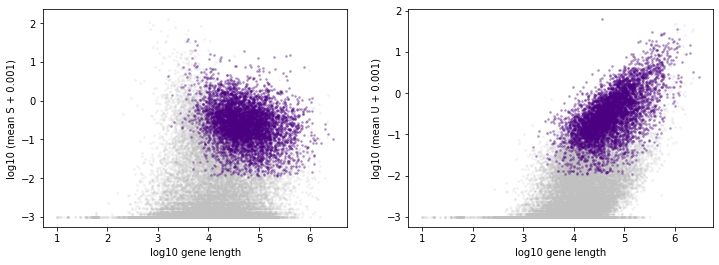

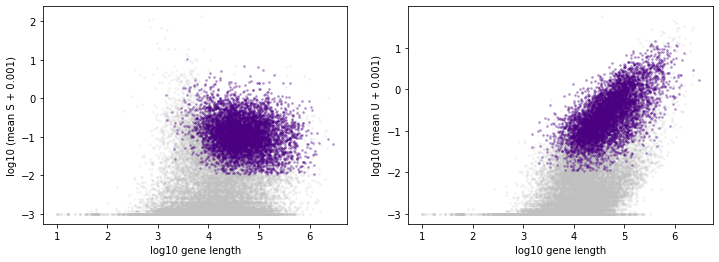

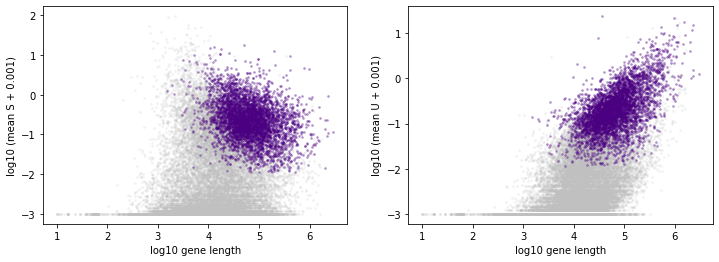

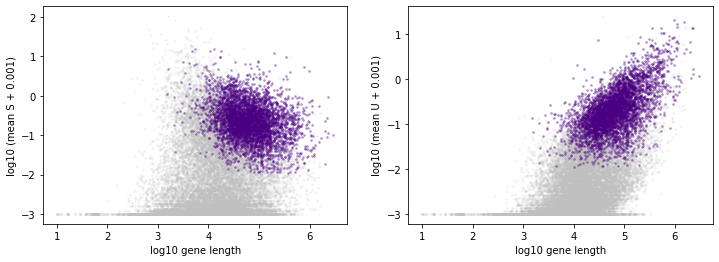

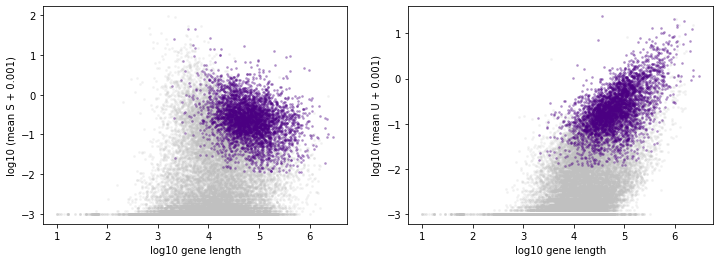

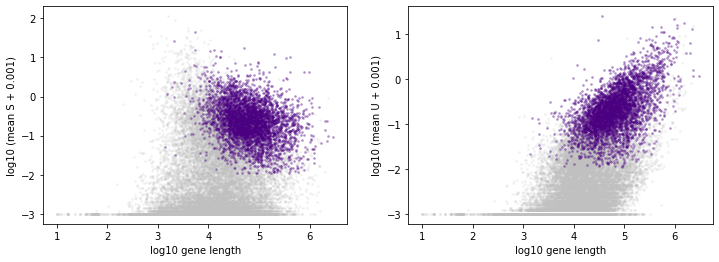

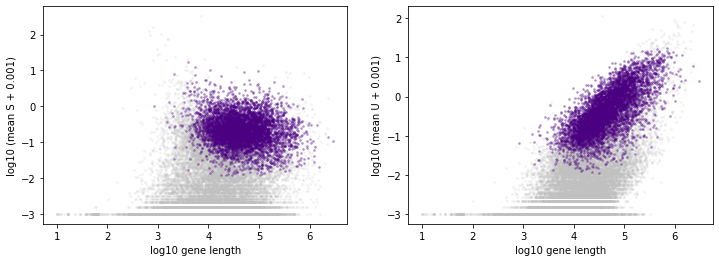

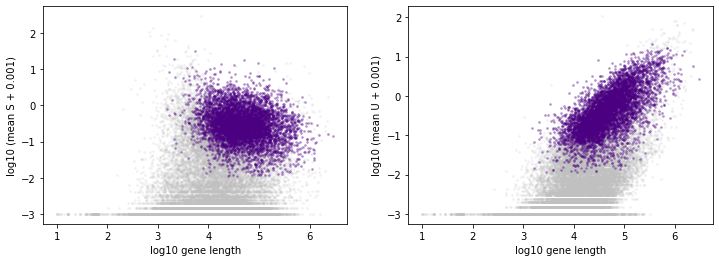

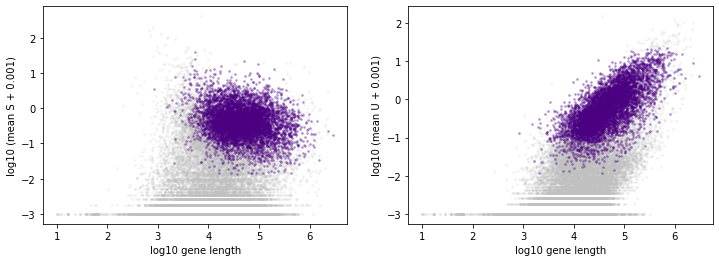

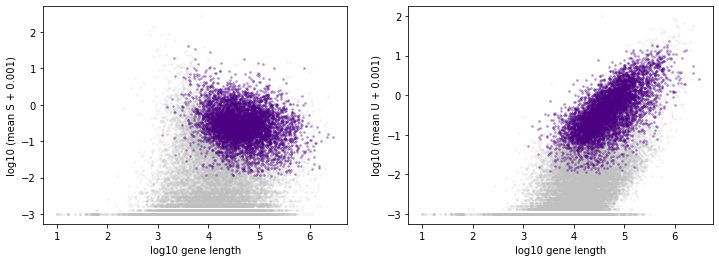

In [6]:
# !rm -r gg_*/
dir_string,dataset_strings = construct_batch(loom_filepaths, \
                                             transcriptome_filepath, \
                                             dataset_names, \
                                             attribute_names=attribute_names,\
                                             batch_location='./fits',meta='nuc_delay',batch_id=1,\
                                             n_genes=1000)

In [7]:

# dir_string = './fits/gg_220430_020_nuc_delay_2'
# dataset_strings = [dir_string+'/'+x for x in dataset_names]
# dir_string = 

In [8]:
n_datasets = len(dataset_strings)

In [9]:
from extract_data import extract_data

Let's try the no-sampling model.

In [10]:
from cme_toolbox import CMEModel
from inference import InferenceParameters, GradientInference


search_data_arr = []


In [11]:
import logging, sys

logging.basicConfig(stream=sys.stdout)
log = logging.getLogger()
log.setLevel(logging.INFO)

INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Global inference parameters stored to ./fits/gg_220507_021_nuc_delay_1/brain_5k_v3/Bursty_None_1x1/parameters.pr.
INFO:root:Beginning data extraction.
INFO:root:Dataset: brain_5k_v3
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_220507_021_nuc_delay_1/genes.csv.
INFO:root:Throwing out the 50 highest spliced expression cells.
INFO:root:Throwing out the 50 highest unspliced expression cells.
INFO:root:Search data stored to ./fits/gg_220507_021_nuc_delay_1/brain_5k_v3/raw.sd.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Runtime: 32.8 seconds.
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Global inference parameters stored to ./fits/gg_220507_021_nuc_delay_1/brain_nuc_5k_v3/B

INFO:root:Global inference parameters stored to ./fits/gg_220507_021_nuc_delay_1/brain_nuc_10x_30k_2/Bursty_None_1x1/parameters.pr.
INFO:root:Beginning data extraction.
INFO:root:Dataset: brain_nuc_10x_30k_2
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_220507_021_nuc_delay_1/genes.csv.
INFO:root:Throwing out the 50 highest spliced expression cells.
INFO:root:Throwing out the 50 highest unspliced expression cells.
INFO:root:Directory ./fits/gg_220507_021_nuc_delay_1/brain_nuc_10x_30k_2/diagnostic_figures created.
INFO:root:Search data stored to ./fits/gg_220507_021_nuc_delay_1/brain_nuc_10x_30k_2/raw.sd.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220507_021_nuc_delay_1/brain_nuc_10x_30k_2/Bursty_None_1x1/analysis_figures created.
INFO:root:Runtime: 32.5 seconds.
INFO:root:Se

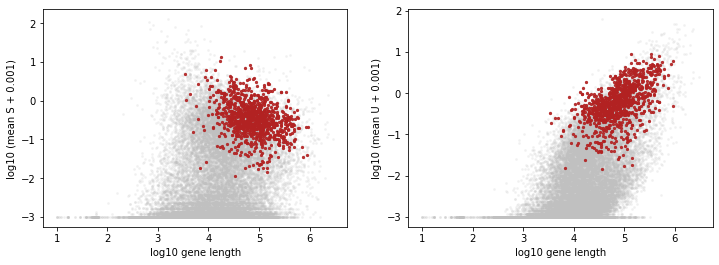

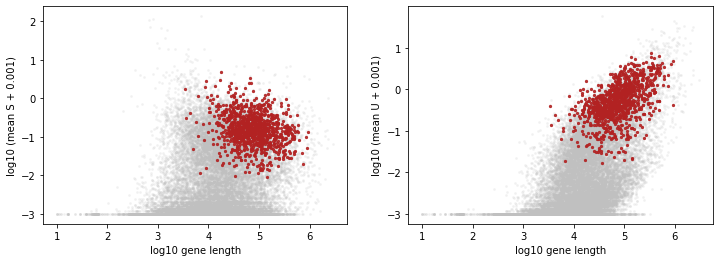

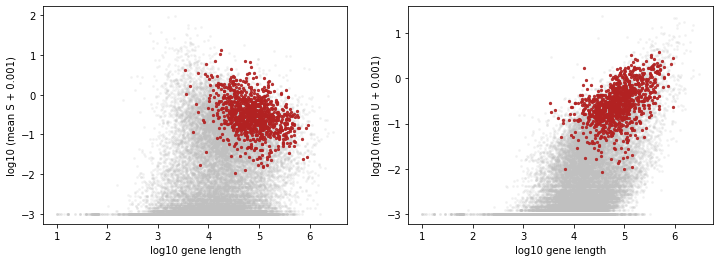

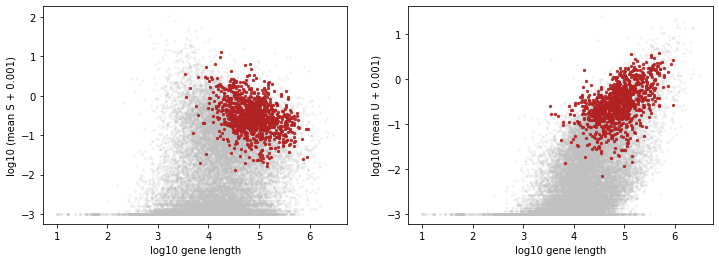

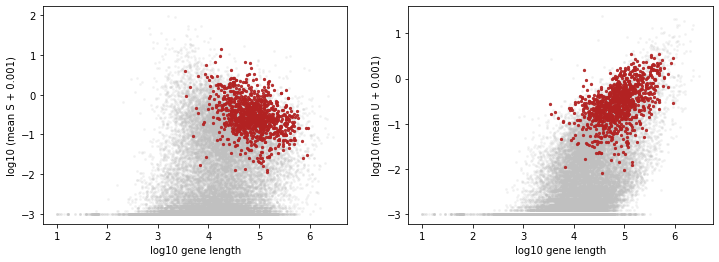

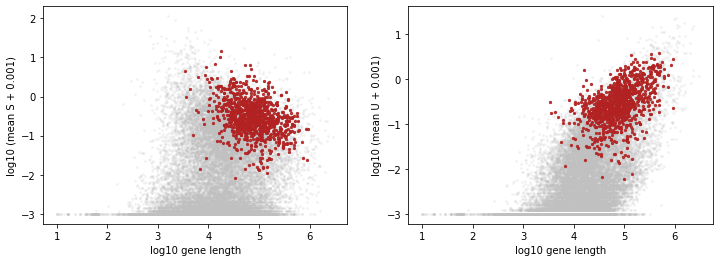

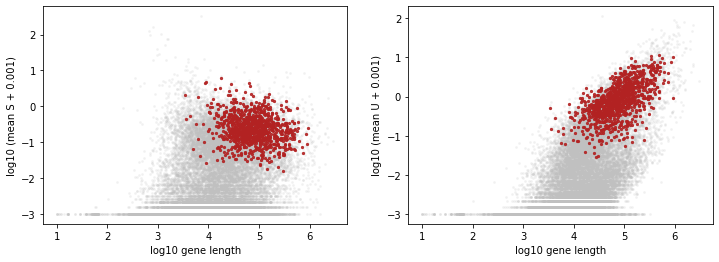

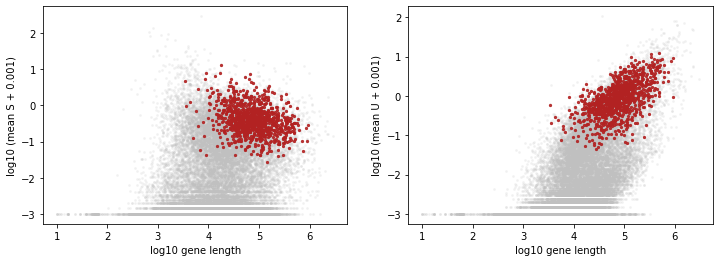

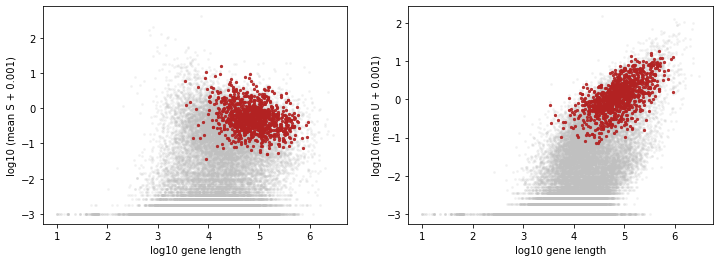

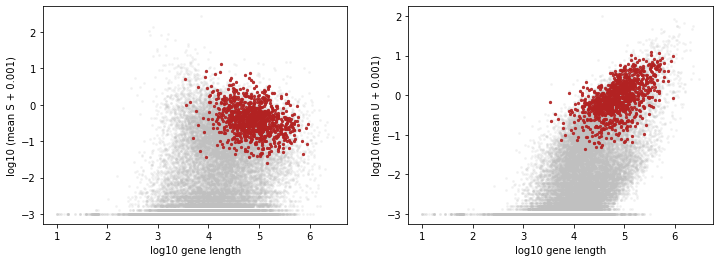

In [13]:
result_strings_burst_none = []
result_strings_delay_none = []

fitmodel = CMEModel('Bursty','None')
for j in range(n_datasets):
    inference_parameters = InferenceParameters([-1.5, -1.8, -1.8 ],\
                [3.0, 3.0, 3.0],[1, 1],[1, 1],[1,1],\
                dataset_strings[j],fitmodel,use_lengths = False,
                gradient_params = {'max_iterations':10,'init_pattern':'moments','num_restarts':1})
    search_data = extract_data(loom_filepaths[j], transcriptome_filepath, dataset_names[j],
                        dataset_strings[j], dir_string, dataset_attr_names=attribute_names,
                        filter_cells_S = 50,filter_cells_U = 50)
    search_data_arr.append(search_data)
    full_result_string = inference_parameters.fit_all_grid_points(1,search_data)
    result_strings_burst_none.append(full_result_string)

In [ ]:
fitmodel = CMEModel('Delay','None')
for j in range(n_datasets):
    inference_parameters = InferenceParameters([-1.5, -1.8, -1.8 ],\
                [3.0, 3.0, 3.0],[1, 1],[1, 1],[1,1],\
                dataset_strings[j],fitmodel,use_lengths = False,
                gradient_params = {'max_iterations':10,'init_pattern':'moments','num_restarts':1})
    search_data = search_data_arr[j]
    full_result_string = inference_parameters.fit_all_grid_points(1,search_data)
    result_strings_delay_none.append(full_result_string)

INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Directory ./fits/gg_220507_021_nuc_delay_1/brain_5k_v3/Delay_None_1x1 created.
INFO:root:Global inference parameters stored to ./fits/gg_220507_021_nuc_delay_1/brain_5k_v3/Delay_None_1x1/parameters.pr.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220507_021_nuc_delay_1/brain_5k_v3/Delay_None_1x1/analysis_figures created.
INFO:root:Runtime: 14.6 seconds.
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Directory ./fits/gg_220507_021_nuc_delay_1/brain_nuc_5k_v3/Delay_None_1x1 created.
INFO:root:Global inference parameters stored to ./fits/gg_220507_021_nuc_delay_1/brain_nuc_5k_v3/Delay_None_1x1/parameters.pr.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned 

In [ ]:
# dataset_names

In [109]:
# result_strings_burst

[]

In [ ]:
result_strings_burst = []
result_strings_delay = []


fitmodel = CMEModel('Bursty','Poisson')
for j in range(n_datasets):
    inference_parameters = InferenceParameters([-1, -1.8, -1.8 ],\
                [4.2, 2.5, 3.5],[-7, -2],[-5, 0],[20,21],\
                dataset_strings[j],fitmodel,use_lengths = True,
                gradient_params = {'max_iterations':10,'init_pattern':'moments','num_restarts':1})
    search_data = search_data_arr[j]
    full_result_string = inference_parameters.fit_all_grid_points(50,search_data)
    result_strings_burst.append(full_result_string)

In [ ]:
fitmodel = CMEModel('Delay','Poisson')
for j in range(n_datasets):
    inference_parameters = InferenceParameters([-1, -1.8, -1.8 ],\
                [4.2, 2.5, 3.5],[-7, -2],[-5, 0],[20,21],\
                dataset_strings[j],fitmodel,use_lengths = True,
                gradient_params = {'max_iterations':10,'init_pattern':'moments','num_restarts':1})
    search_data = search_data_arr[j]
    full_result_string = inference_parameters.fit_all_grid_points(50,search_data)
    result_strings_delay.append(full_result_string)

In [21]:
import importlib
# importlib.reload(analysis)


In [ ]:
import inference
import analysis
# importlib.reload(inference)


In [26]:
# InferenceParameters??

In [27]:
importlib.reload(analysis)
importlib.reload(inference)
# importlib.reload(plot_aesthetics)


<module 'inference' from '/home/ggorin/projects/seq-cme-technoise/inference.py'>

In [11]:
# import cme_toolbox



/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset_strings

In [ ]:
import analysis
from analysis import *
# import inference
# from inference import *

In [13]:
# res_strings = ['./gg_220410_020_batch_1/pbmc_1k_fbc/Bursty_Poisson_10x10/grid_scan_results.res',\
#                './gg_220410_020_batch_1/pbmc_1k_v3/Bursty_Poisson_10x10/grid_scan_results.res']
# search_data_strings = ['./gg_220410_020_batch_1/pbmc_1k_fbc/raw.sd',\
#                './gg_220410_020_batch_1/pbmc_1k_v3/raw.sd']
# dir_string = './gg_220410_020_batch_1'

In [14]:
# def load_search_data(search_data_string):
#     try:
#         with open(search_data_string,'rb') as sdfs:
#             sd = pickle.load(sdfs)
#         log.info('Search data loaded from {}.'.format(search_data_string))
#         return sd
#     except:
#         log.error('Search data could not be loaded from {}.'.format(search_data_string))


In [19]:
# dir_string = './fits/gg_220422_020_allen_celltypes_1'

In [126]:
sd_strings = [x+'/raw.sd' for x in dataset_strings]
search_data_arr = [load_search_data(x) for x in sd_strings]


INFO:root:Search data loaded from ./fits/gg_220506_021_nuc_delay_1/brain_5k_v3/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220506_021_nuc_delay_1/brain_nuc_5k_v3/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220506_021_nuc_delay_1/brain_10x_30k_1/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220506_021_nuc_delay_1/brain_10x_30k_2/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220506_021_nuc_delay_1/brain_10x_30k_3/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220506_021_nuc_delay_1/brain_10x_30k_4/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_1/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_2/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_3/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_4/raw.sd.


In [112]:
# result_strings = ['./fits/gg_220422_020_allen_celltypes_1/allen_A08_gaba/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_B01_gaba/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_B01_glu/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_B08_gaba/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_B08_glu/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_C01_gaba/Bursty_Poisson_15x15/grid_scan_results.res',
#  './fits/gg_220422_020_allen_celltypes_1/allen_C01_glu/Bursty_Poisson_15x15/grid_scan_results.res']
# n_datasets = len(result_strings)

In [113]:
# result_strings_upd = [x[:-4]+'_upd.res' for x in result_strings]

In [ ]:
# sr_arr = []
sd_arr = search_data_arr

# for j in range(n_datasets):
#     sr = load_search_results(result_strings_upd[j])
#     sr_arr.append(sr)

In [121]:
search_data_arr

[]

In [115]:
result_strings_burst

['./fits/gg_220506_021_nuc_delay_1/brain_5k_v3/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_nuc_5k_v3/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_10x_30k_1/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_10x_30k_2/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_10x_30k_3/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_10x_30k_4/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_1/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_2/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_3/Bursty_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_4/Bursty_Poisson_20x21/grid_scan_results.res']

In [ ]:
sr_burst_arr = []


for j in range(n_datasets):
    sr = load_search_results(result_strings_burst[j])
    sd = sd_arr[j]
    fig1,ax1 = plt.subplots(1,1)
    sr.find_sampling_optimum()
    sr.plot_landscape(ax1)

    print(sr.samp_optimum)
    
    
    fig1,ax1 = plt.subplots(1,1)
    sr.plot_KL(ax1)
    
    sr.plot_gene_distributions(sd,marg='joint')
    
    _=sr.chisquare_testing(sd)
    
#     #these do not make sense to do for a single "virtual" grid point
    sr.resample_opt_viz()
    sr.resample_opt_mc_viz()
    sr.chisq_best_param_correction(sd,viz=True) 
# #     print(sr.samp_optimum_ind)

# #     sr.compute_sigma(sd)
    sr.plot_param_L_dep(plot_errorbars=False,plot_fit=True)
# #     sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
    sr.plot_param_marg()
    sr.update_on_disk()
    sr_burst_arr.append(sr)


In [ ]:
sr_delay_arr = []


for j in range(n_datasets):
    sr = load_search_results(result_strings_delay[j])
    # sd = load_search_data(search_data_strings[j])
    sd = sd_arr[j]
    fig1,ax1 = plt.subplots(1,1)
    sr.find_sampling_optimum()
    sr.plot_landscape(ax1)

    print(sr.samp_optimum)
    
    
    fig1,ax1 = plt.subplots(1,1)
    sr.plot_KL(ax1)
    
    sr.plot_gene_distributions(sd,marg='joint')
    
    _=sr.chisquare_testing(sd)
    
    #these do not make sense to do for a single "virtual" grid point
    sr.resample_opt_viz()
    sr.resample_opt_mc_viz()
    sr.chisq_best_param_correction(sd,viz=True) 
#     print(sr.samp_optimum_ind)

#     sr.compute_sigma(sd)
    sr.plot_param_L_dep(plot_errorbars=False,plot_fit=True)
#     sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
    sr.plot_param_marg()
    sr.update_on_disk()
    sr_delay_arr.append(sr)


In [116]:
result_strings_delay

['./fits/gg_220506_021_nuc_delay_1/brain_5k_v3/Delay_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_nuc_5k_v3/Delay_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_10x_30k_1/Delay_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_10x_30k_2/Delay_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_10x_30k_3/Delay_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_10x_30k_4/Delay_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_1/Delay_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_2/Delay_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_3/Delay_Poisson_20x21/grid_scan_results.res',
 './fits/gg_220506_021_nuc_delay_1/brain_nuc_10x_30k_4/Delay_Poisson_20x21/grid_scan_results.res']

In [ ]:
sr_burst_none_arr = []
sr_delay_none_arr = []

for j in range(n_datasets):
    sr = load_search_results(result_strings_burst_none[j])
    sd = sd_arr[j]
    sr.find_sampling_optimum()
    
    fig1,ax1 = plt.subplots(1,1)
    sr.plot_KL(ax1)
    
    sr.plot_gene_distributions(sd,marg='joint')
    
    _=sr.chisquare_testing(sd)

    sr.plot_param_L_dep(plot_errorbars=False,plot_fit=True)
    sr.plot_param_marg()
    sr.update_on_disk()
    sr_burst_none_arr.append(sr)
    
for j in range(n_datasets):
    sr = load_search_results(result_strings_delay_none[j])
    sd = sd_arr[j]
    sr.find_sampling_optimum()
    
    fig1,ax1 = plt.subplots(1,1)
    sr.plot_KL(ax1)
    
    sr.plot_gene_distributions(sd,marg='joint')
    
    _=sr.chisquare_testing(sd)

    sr.plot_param_L_dep(plot_errorbars=False,plot_fit=True)
    sr.plot_param_marg()
    sr.update_on_disk()
    sr_delay_none_arr.append(sr)

In [ ]:
[x.rejected_genes.sum() for x in sr_delay_arr]

In [ ]:
[x.rejected_genes.sum() for x in sr_burst_arr]

In [ ]:
dataset_names

In [ ]:
matched_indices = [[0,1],[2,6],[3,7],[4,8],[5,9]]

In [42]:
# sr_burst_arr = []
# sd_arr = search_data_arr

# for j in range(n_datasets):
#     sr = load_search_results(result_strings[j])
#     # sd = load_search_data(search_data_strings[j])
#     sd = sd_arr[j]
# #     fig1,ax1 = plt.subplots(1,1)
#     sr.find_sampling_optimum()
# #     sr.plot_landscape(ax1)

# #     print(sr.samp_optimum)
    
    
#     fig1,ax1 = plt.subplots(1,1)
#     sr.plot_KL(ax1)
    
#     sr.plot_gene_distributions(sd,marg='joint')
    
#     _=sr.chisquare_testing(sd)
    
# #     #these do not make sense to do for a single "virtual" grid point
# #     sr.resample_opt_viz()
# #     sr.resample_opt_mc_viz()
# #     sr.chisq_best_param_correction(sd,viz=True) 
# #     print(sr.samp_optimum_ind)

#     sr.compute_sigma(sd)
#     sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
#     sr.plot_param_marg()
#     sr.update_on_disk()
#     sr_arr.append(sr)

In [ ]:
dataset_meta = ['5k']+['30k_'+str(i) for i in range(1,5)]

In [ ]:
dataset_meta

In [ ]:
for i in range(len(matched_indices)):
    ind1 = matched_indices[i][0]
    ind2 = matched_indices[i][1]
    plot_params_for_pair(sr_burst_arr[ind1],sr_burst_arr[ind2],dir_string = dir_string,\
                         distinguish_rej=True,plot_errorbars=False,meta = dataset_meta[i]+'_burst',xlabel = dataset_names[ind1],\
                         ylabel = dataset_names[ind2])

In [ ]:
for i in range(len(matched_indices)):
    ind1 = matched_indices[i][0]
    ind2 = matched_indices[i][1]
    plot_params_for_pair(sr_delay_arr[ind1],sr_delay_arr[ind2],dir_string = dir_string,\
                         distinguish_rej=True,plot_errorbars=False,meta = dataset_meta[i]+'_delay',xlabel = dataset_names[ind1],\
                         ylabel = dataset_names[ind2])

In [ ]:
burst_logL = [sr_burst_arr[i].get_logL(sd_arr[i]) for i in range(n_datasets)]
delay_logL = [sr_delay_arr[i].get_logL(sd_arr[i]) for i in range(n_datasets)]
poiss_logL = [sr_delay_arr[i].get_logL_Poiss(sd_arr[i]) for i in range(n_datasets)]

In [ ]:
burst_AIC = [2*3-2*burst_logL[i] for i in range(n_datasets)]
delay_AIC = [2*3-2*delay_logL[i] for i in range(n_datasets)]
poiss_AIC = [2*2-2*poiss_logL[i] for i in range(n_datasets)]

In [ ]:
model_AICs = [np.asarray([burst_AIC[i],delay_AIC[i],poiss_AIC[i]]) for i in range(n_datasets)]

In [ ]:
min_AIC = [model_AICs[i].min(0) for i in range(n_datasets)]
normalization = [np.exp(-(model_AICs[i] - min_AIC[i])/2).sum(0) for i in range(n_datasets)]

In [ ]:
wmodel = [np.exp(-(model_AICs[i] - min_AIC[i])/2) / normalization[i] for i in range(n_datasets) ]
mname = ('burst','delay','poisson')

In [ ]:
# wmodel[9][2].max()

In [ ]:
model_ind = 0
fig1,ax1 = plt.subplots(2,5,figsize=(12,5))
for i in range(10):
    axl = np.unravel_index(i,(2,5))
    ax1[axl].hist(wmodel[i][model_ind],density=False,alpha=0.3)
    ax1[axl].set_title(dataset_names[i])
    ax1[axl].set_xlabel('Akaike weight of {} model'.format(mname[model_ind]))
    ax1[axl].set_xlim([0,1])
fig1.tight_layout()

In [ ]:
matched_indices

In [ ]:
from scipy import stats
plt.figure(figsize=(10,5))
for i in range(len(matched_indices)):
    for j in range(i+1,len(matched_indices)):
        ind1 = matched_indices[i][0]
        ind2 = matched_indices[j][0]

        kde = stats.gaussian_kde(wmodel[ind1][0]-wmodel[ind2][0],bw_method=0.05)
        xx = np.linspace(-1.2, 1.2, 2000)
        plt.plot(xx, kde(xx))
# plt.legend()
plt.ylabel('KDE of gene distribution')
plt.xlabel('Akaike weight change of bursty model from sc to sc')
#     plt.hist(wmodel[ind1][0]-wmodel[ind2][0],50,alpha=0.2)

In [ ]:
from scipy import stats
plt.figure(figsize=(10,5))
for i in range(len(matched_indices)):
    for j in range(i+1,len(matched_indices)):
        ind1 = matched_indices[i][1]
        ind2 = matched_indices[j][1]

        kde = stats.gaussian_kde(wmodel[ind1][0]-wmodel[ind2][0],bw_method=0.05)
        xx = np.linspace(-1.2, 1.2, 2000)
        plt.plot(xx, kde(xx))
# plt.legend()
plt.ylabel('KDE of gene distribution')
plt.xlabel('Akaike weight change of bursty model from sn to sn')
#     plt.hist(wmodel[ind1][0]-wmodel[ind2][0],50,alpha=0.2)

In [ ]:
from scipy import stats
plt.figure(figsize=(10,5))
for i in range(len(matched_indices)):
    ind1 = matched_indices[i][0]
    ind2 = matched_indices[i][1]
    
    kde = stats.gaussian_kde(wmodel[ind1][0]-wmodel[ind2][0],bw_method=0.05)
    xx = np.linspace(-1.2, 1.2, 2000)
#     fig, ax = plt.subplots(figsize=(8,6))
#     ax.hist(x, density=True, bins=bins, alpha=0.3)
    plt.plot(xx, kde(xx),label=dataset_meta[i])
plt.legend()
plt.ylabel('KDE of gene distribution')
plt.xlabel('Akaike weight change of bursty model from sc to sn')
#     plt.hist(wmodel[ind1][0]-wmodel[ind2][0],50,alpha=0.2)

In [221]:
# sd_arr[0].moments


In [ ]:
# for i in range(4):
# #     print(sr_arr[i*2-1].samp_optimum)
# #     print(sr_arr[i*2].samp_optimum)
#     plot_params_for_pair(sr_arr[i*2-1],sr_arr[i*2],dir_string = dir_string,\
#                          distinguish_rej=True,plot_errorbars=True,meta = dataset_meta[i],xlabel = dataset_names[i*2-1],\
#                          ylabel = dataset_names[i*2])

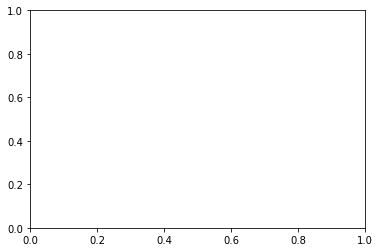

In [149]:
fig1,ax1 = plt.subplots(1,1)
# sr_arr_delay[5].plot_landscape(ax1)

In [89]:
matched_indices

[[0, 1], [2, 6], [3, 7], [4, 8], [5, 9]]

Instead of comparing parameters, we can compare raw means... this is how standard DE/ marker genes would be computed.

Beta: [-0.04692723]
Beta Std Error: [0.0020402]
Beta Covariance: [[0.002]]
Residual Variance: 0.002081208792389776
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [0.55142269]
Beta Std Error: [0.00433458]
Beta Covariance: [[0.002]]
Residual Variance: 0.009394278971456064
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [0.52560742]
Beta Std Error: [0.0034648]
Beta Covariance: [[0.002]]
Residual Variance: 0.006002429520344887
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [0.71667305]
Beta Std Error: [0.00406338]
Beta Covariance: [[0.002]]
Residual Variance: 0.008255527115261785
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [0.50621644]
Beta Std Error: [0.00299664]
Beta Covariance: [[0.002]]
Residual Variance: 0.004489917407293888
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


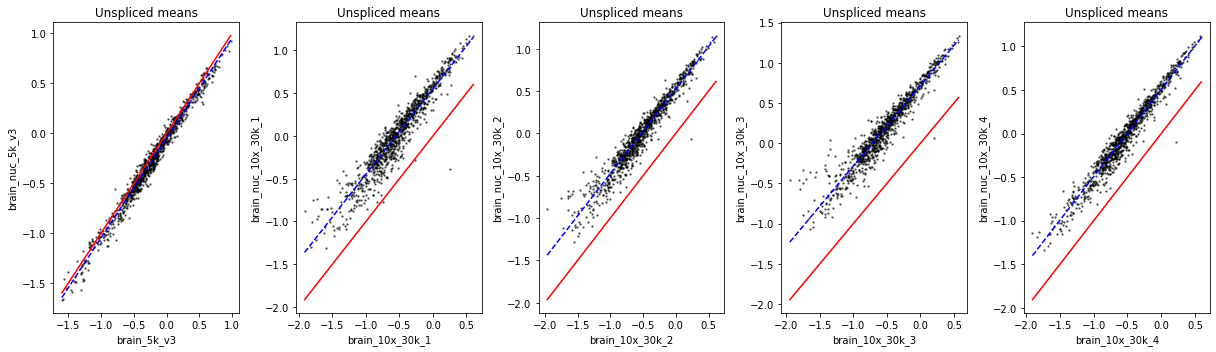

In [100]:
fig1,ax = plt.subplots(1,5,figsize=(17,5))

for i in range(len(matched_indices)):
#     print(sr_arr[i*2-1].samp_optimum)
#     print(sr_arr[i*2].samp_optimum)
    ind1 = matched_indices[i][0]
    ind2 = matched_indices[i][1]
    m1 = np.log10([x['U_mean'] for x in sd_arr[ind1].moments])
    m2 = np.log10([x['U_mean'] for x in sd_arr[ind2].moments])
#     m1 = np.log10([x['S_mean'] for x in sd_arr[ind1].moments])
#     m2 = np.log10([x['S_mean'] for x in sd_arr[ind2].moments])
#     print(m1[:10])
#     plt.figure()
    ax[i].scatter(m1,m2,2,'k',alpha=0.5)
    xl = [min(m1),max(m1)]
    ax[i].plot(xl,xl,'r-')
    
    d = odr.Data(m1,m2)
    idoffsmod = scipy.odr.Model(idoffset)

    myodr = odr.ODR(d, idoffsmod, beta0=[0])
    out = myodr.run()
    
    ax[i].plot(xl,out.beta+xl,'b--')
#     print(dir(myoutput))
    out.pprint()

    ax[i].set_xlabel(dataset_names[ind1])
    ax[i].set_ylabel(dataset_names[ind2])

    ax[i].set_title('Unspliced means')
#     ax[i].set_title('Spliced means')
fig1.tight_layout()
#     plt.xscale('log')
#     plt.yscale('log')
#     (sr_arr[i*2-1],sr_arr[i*2],dir_string = dir_string,\
#                          distinguish_rej=True,plot_errorbars=True,meta = dataset_meta[i],xlabel = dataset_names[i*2-1],\
#                          ylabel = dataset_names[i*2])

INFO:root:Falling back on generic marker properties.


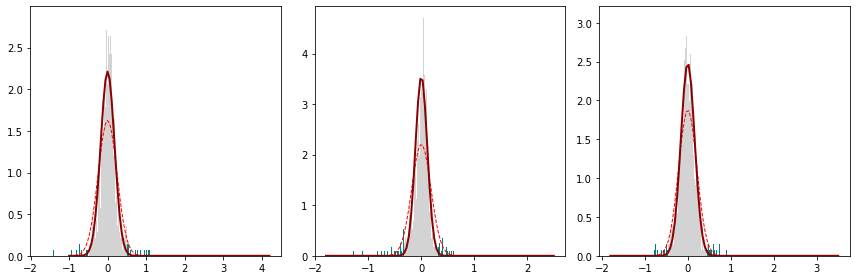

In [116]:
for i in range(1):
#     print(sr_arr[i*2-1].samp_optimum)
#     print(sr_arr[i*2].samp_optimum)
    gn_params,gf_params = plot_residuals(sr_arr[i*2-1],sr_arr[i*2],dir_string = dir_string,\
                         distinguish_rej=False,plot_errorbars=False,meta = dataset_meta[i],xlabel = dataset_names[i*2-1],\
                         ylabel = dataset_names[i*2])
#     z = (resid-fitparams[0])/fitparams[1]
#     gene_filter = np.logical_not((scipy.stats.norm.sf(np.abs(z))*2)<(0.05/len(z)))
#     fitparams,resid = plot_residuals(sr_arr[i*2-1],sr_arr[i*2],dir_string = dir_string,gene_filter = gene_filter,\
#                          distinguish_rej=False,plot_errorbars=False,meta = dataset_meta[i],xlabel = dataset_names[i*2-1],\
#                          ylabel = dataset_names[i*2])
    
#     scipy.stats.norm.sf(abs(-0.77))
    

In [592]:
sum(~gene_filter)

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6

In [593]:
sr_arr[0].gene_names[~gene_filter]

array(['Dlx6os1', 'Igf1', 'Erbin', 'Cacna2d1', 'Tns1', 'Eps8'],
      dtype='<U16')

In [335]:
fitparams

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-0.010083967131470604, 0.19638072533018613)

In [76]:
def plot_residuals(sr1,sr2,dir_string,gene_filter = None,\
                     plot_errorbars=False,\
                     figsize=(12,4),c=2.576,\
                     axis_search_bounds = True,
                     distinguish_rej = True,
                     plot_identity = True,
                     meta = '12',
                     xlabel = 'dataset 1',
                     ylabel = 'dataset 2',
                     viz=True):
    if viz:
        fig1,ax1=plt.subplots(nrows=1,ncols=3,figsize=figsize)

    if gene_filter is None:
        gene_filter = np.ones(sr1.phys_optimum.shape[0],dtype=bool)
        gene_filter_rej = ~gene_filter
    else:
        if gene_filter.dtype != np.bool:
            gf_temp = np.zeros(sr1.phys_optimum.shape[0],dtype=bool)
            gf_temp[gene_filter] = True
            gene_filter = gf_temp
            gene_filter_rej = np.zeros(sr1.phys_optimum.shape[0],dtype=bool) #something like this...
        else:
            gene_filter = np.copy(gene_filter)
            gene_filter_rej = np.zeros(gene_filter.shape,dtype=bool)

    if distinguish_rej: #default
        if hasattr(sr1,'rejected_genes') and hasattr(sr2,'rejected_genes'):
            if sr1.rejection_index != sr1.samp_optimum_ind:
                log.warning('Sampling parameter value is inconsistent.')
                distinguish_rej = False
            elif sr2.rejection_index != sr2.samp_optimum_ind:
                log.warning('Sampling parameter value is inconsistent.')
                distinguish_rej = False
            else: #if everything is ready
                gene_filter_rej =  np.logical_and(gene_filter,np.logical_or(sr1.rejected_genes,sr2.rejected_genes))
                gene_filter = np.logical_and(gene_filter,~sr1.rejected_genes,~sr2.rejected_genes)
                acc_point_aesth = ('accepted_gene_color','accepted_gene_alpha','accepted_gene_ms')
                rej_point_aesth = ('rejected_gene_color','rejected_gene_alpha','rejected_gene_ms')
        else:
            log.info('Gene rejection needs to be precomputed to distinguish rejected points.')
            distinguish_rej = False

    if not distinguish_rej: #don't distinguish
        acc_point_aesth = ('generic_gene_color','generic_gene_alpha','generic_gene_ms')
#         acc_point_aesth = ('generic_gene_color','generic_gene_alpha','generic_gene_ms')
        log.info('Falling back on generic marker properties.') 
    
    gn = []
    gf_ = []
    for i in range(3):
        xl = [sr1.sp.phys_lb[i],sr1.sp.phys_ub[i]]
        if viz:
            gf = diffexp_fpe(xl,sr1.phys_optimum[gene_filter,i],sr2.phys_optimum[gene_filter,i],\
                             ax1=ax1[i],s1=sr1.sigma[gene_filter,i],s2=sr2.sigma[gene_filter,i],nit=10,viz=viz)
        else:
            gf = diffexp_fpe(xl,sr1.phys_optimum[gene_filter,i],sr2.phys_optimum[gene_filter,i],\
                             s1=sr1.sigma[gene_filter,i],s2=sr2.sigma[gene_filter,i],nit=10,viz=viz)
        gn.append(sr1.gene_names[~gf])
        gf_.append(gf)
    if viz:
        fig1.tight_layout()
    return  gn, gf_


In [84]:
from scipy import odr
def idoffset(B, x):
    return x + B[0]

def diffexp_fpe(xl,m1,m2,ax1=None,s1=None,s2=None,nit=1,pval = 0.005,viz=True):
    
    gf = np.ones(len(m1),dtype=bool)
    x = np.linspace(xl[0], xl[1], 100)
    fitlaw = scipy.stats.norm
    
    for j in range(nit):
        d = odr.Data(m1[gf],m2[gf])
        idoffsmod = scipy.odr.Model(idoffset)

        myodr = odr.ODR(d, idoffsmod, beta0=[0])
        out = myodr.run()
        resid = m2-m1-out.beta
        fitparams = fitlaw.fit(resid[gf])
        p = fitlaw.pdf(x, *fitparams)
        if j==0 and viz:
            ax1.plot(x, p, '--', \
                        linewidth=1,\
                        color='r')

        z = (resid-fitparams[0])/fitparams[1]
        gf = np.logical_not((scipy.stats.norm.sf(np.abs(z))*2)<(pval))
        if j==(nit-1) and viz:
            n,bins = np.histogram(resid,200,density=True)
            binc = np.diff(bins)/2 + bins[:-1]
            ax1.bar(binc,n,width=np.diff(bins),color = 'lightgrey',align='center')
            ax1.plot(x, p, '-', \
                        linewidth=2,\
                        color='darkred')
            y_,_ = np.histogram(resid[~gf],bins=bins,density=True)
            y_ *=(~gf).mean()
            ax1.bar(binc,y_,width=np.diff(bins),color = 'teal',align='center')
    return gf


In [603]:
sd_arr

In [666]:
np.asarray(None) is None

False

In [69]:
def compare_gene_distributions(sr,sd,sz = (1,3),figsize = (12,5),\
               marg='joint',logscale=None,title=True,\
               genes_to_plot = None,fc = ('lightsteelblue','lightcoral'),lc=('royalblue','red')):
    if logscale is None:
        if marg=='joint':
            logscale = True
        else:
            logscale = False
#     print(logscale)
    (nrows,ncols)=sz
    
    fig1,ax1=plt.subplots(nrows=nrows,ncols=ncols,figsize=figsize)

    nax = np.prod(sz)
    if genes_to_plot is None:
        genes_to_plot = np.arange(nax)
    
    genes_to_plot = np.asarray(genes_to_plot)
#     print(genes_to_plot.dtype)
#     if len(genes_to_plot)==1:
#         genes_to_plot = np.arange(genes_to_plot)
    if genes_to_plot.dtype == bool:
        gtp_temp = np.arange(sr[0].n_genes)
        genes_to_plot = gtp_temp[genes_to_plot]
#     print(genes_to_plot)
    
    number_of_genes_to_plot = len(genes_to_plot)
    if number_of_genes_to_plot > sr[0].n_genes:
        number_of_genes_to_plot = sr[0].n_genes
        genes_to_plot = genes_to_plot[:sr[0].n_genes]
    if number_of_genes_to_plot>nax:
        number_of_genes_to_plot = nax
        genes_to_plot = genes_to_plot[:nax]
#     print(genes_to_plot)
    
    j_ = 0
    for i_ in genes_to_plot:
        axloc = np.unravel_index(j_,sz) if (sz[0]>1 and sz[1]>1) else j_

        for j in range(len(sr)):
            lm = [sd[j].M[i_],sd[j].N[i_]]
            if marg == 'mature':
                lm[0]=1
            if marg == 'nascent':
                lm[1]=1
            samp = None if (sr[j].model.seq_model == 'None') else sr[j].regressor_optimum[i_]
            Pa = np.squeeze(sr[j].model.eval_model_pss(sr[j].phys_optimum[i_],lm,samp))

            if marg=='joint':
                log.error('Potentially implement this later...')
                raise ValueError('Cannot compare two 2D histograms!')
            else:
                plot_hist_and_fit(ax1[axloc],sd[j],i_,Pa,marg,facealpha=0.5,facecolor=fc[j],fitcolor=lc[j])
        if logscale:
#                 print(logscale)
            ax1[axloc].set_yscale('log')
        if title: #add a "rejected" thing
            ax1[axloc].set_title(sd[0].gene_names[i_],fontdict={'fontsize': 9})

        ax1[axloc].set_xticks([])
        ax1[axloc].set_yticks([])

        j_+=1
    fig1.tight_layout(pad=0.02)

def plot_hist_and_fit(ax1,sd,i_,Pa,marg='nascent',\
                      facecolor=aesthetics['hist_face_color'],\
                      fitcolor=aesthetics['hist_fit_color'],facealpha=1):
    if marg=='nascent':
        ax1.hist(sd.U[i_],
                        bins=np.arange(sd.M[i_])-0.5,\
                        density=True,\
                        color=facecolor,alpha=facealpha)
        ax1.plot(np.arange(sd.M[i_]),Pa,\
                        color=fitcolor)
#         ax1.set_xlim([-0.5,sd.U[i_].max()+2.5])
    elif marg =='mature':
        ax1.hist(sd.S[i_],
                        bins=np.arange(sd.N[i_])-0.5,\
                        density=True,\
                        color=facecolor,alpha=facealpha)
        ax1.plot(np.arange(sd.N[i_]),Pa,\
                        color=fitcolor)
#         ax1.set_xlim([-0.5,sd.S[i_].max()+2.5])
        
            


In [65]:
# gtp=np.zeros(search_data.n_genes,dtype=bool)
# gtp[20:29] = True

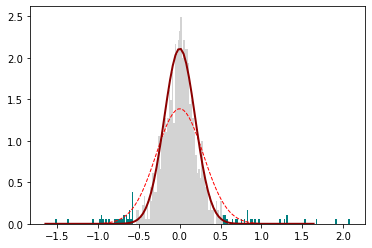

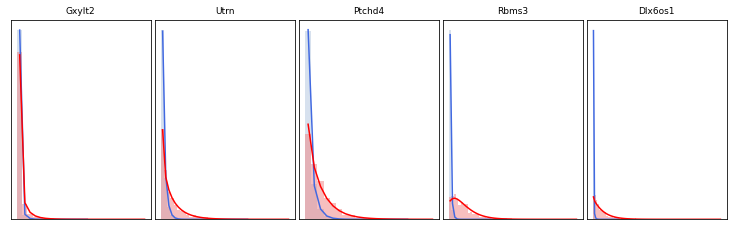

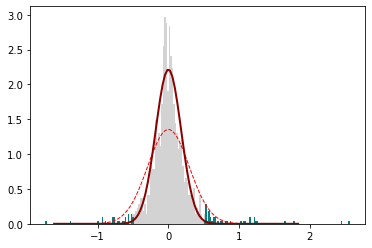

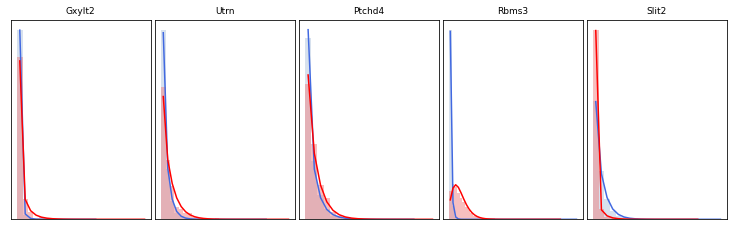

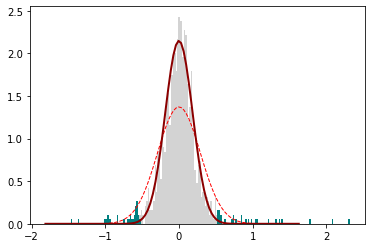

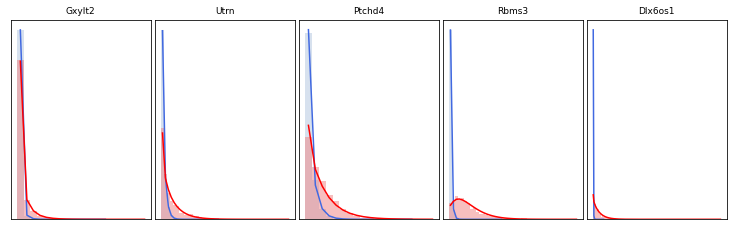

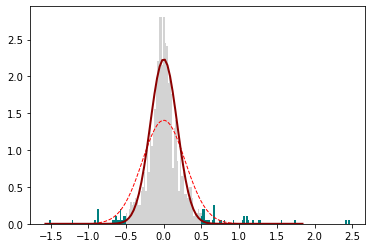

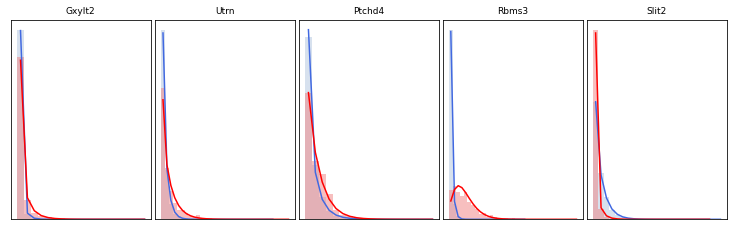

In [91]:
for i in range(4):
    m1 = np.log10([x['S_mean'] for x in sd_arr[i*2-1].moments])
    m2 = np.log10([x['S_mean'] for x in sd_arr[i*2].moments])
    xl = [min(m1),max(m1)]
    fig1,ax1 = plt.subplots()
    gf_naive = diffexp_fpe(xl,m1,m2,s1=None,s2=None,ax1=ax1,nit=10)
    gn_naive = sd_arr[i*2-1].gene_names[~gf_naive]
    compare_gene_distributions((sr_arr[i*2-1],sr_arr[i*2]),(sd_arr[i*2-1],sd_arr[i*2]),marg='mature',\
                              logscale=False,sz = (1,5),figsize=(10,3),genes_to_plot = ~gf_naive)
#                          distinguish_rej=False,plot_errorbars=False,meta = dataset_meta[i],xlabel = dataset_names[i*2-1],\
#                          ylabel = dataset_names[i*2])

INFO:root:Falling back on generic marker properties.
[-0.06150536 -0.20679801 -0.97433482 -0.30848083  0.61311248]
[ 0.03485362 -0.29629649 -0.93904357 -0.32049743  0.60205999]


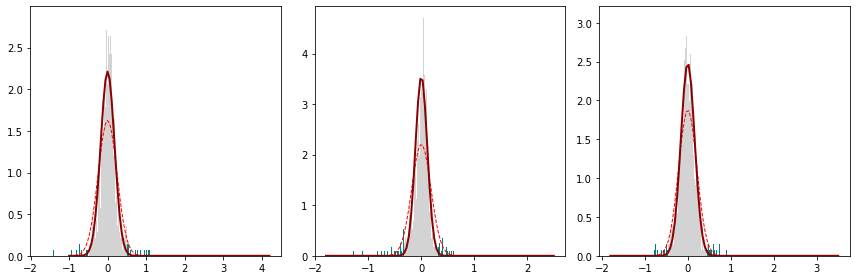

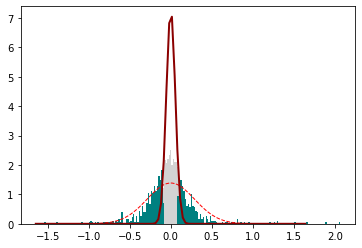

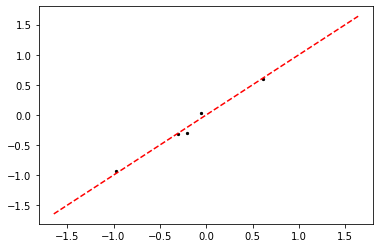

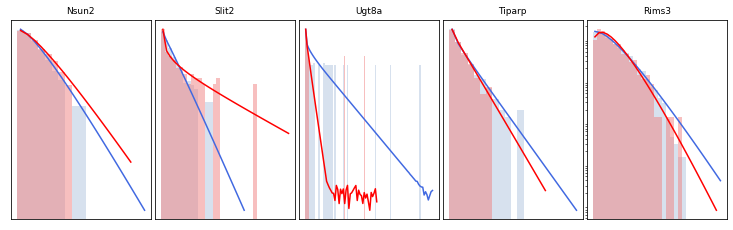

In [141]:
for i in range(1):
    gn_params,gf_params = plot_residuals(sr_arr[i*2-1],sr_arr[i*2],dir_string = dir_string,\
                         distinguish_rej=False,plot_errorbars=False,meta = dataset_meta[i],xlabel = dataset_names[i*2-1],\
                         ylabel = dataset_names[i*2],viz=True)
    
    m1 = np.log10([x['S_mean'] for x in sd_arr[i*2-1].moments])
    m2 = np.log10([x['S_mean'] for x in sd_arr[i*2].moments])
    xl = [min(m1),max(m1)]
    fig1,ax1 = plt.subplots()
    gf_naive = diffexp_fpe(xl,m1,m2,s1=None,s2=None,ax1=ax1,nit=10,viz=True,pval=0.1)
    gn_naive = sd_arr[i*2-1].gene_names[~gf_naive]
#     compare_gene_distributions((sr_arr[i*2-1],sr_arr[i*2]),(sd_arr[i*2-1],sd_arr[i*2]),marg='mature',\
#                               logscale=False,sz = (1,5),figsize=(10,3),genes_to_plot = ~gf_naive)

    gtp =  np.logical_and(~gf_params[0],np.abs(m1-m2) < 0.1)
#     gtp =  np.logical_and(~gf_params[0],gf_naive)
    plt.figure()
    print(m1[gtp])
    print(m2[gtp])
    plt.scatter(m1[gtp],m2[gtp],c='k',s=5)
    plt.plot(xl,xl,'r--')
    compare_gene_distributions((sr_arr[i*2-1],sr_arr[i*2]),(sd_arr[i*2-1],sd_arr[i*2]),marg='mature',\
                              logscale=True,sz = (1,5),figsize=(10,3),genes_to_plot = gtp)


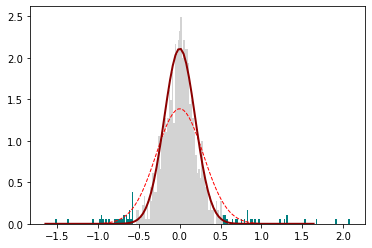

In [119]:
for i in range(1):
    m1 = np.log10([x['S_mean'] for x in sd_arr[i*2-1].moments])
    m2 = np.log10([x['S_mean'] for x in sd_arr[i*2].moments])
    xl = [min(m1),max(m1)]
    fig1,ax1 = plt.subplots()
    gf_naive = diffexp_fpe(xl,m1,m2,ax1,s1=None,s2=None,nit=10)
    gn_naive = sd_arr[i*2-1].gene_names[~gf_naive]

In [110]:
gn_naive

array(['Gxylt2', 'Utrn', 'Ptchd4', 'Rbms3', 'Slit2', 'Dlx6os1', 'Rab27b',
       'Egln3', 'Igf1', 'Slc39a10', 'Etv1', 'Mast3', 'Ptprz1', 'Gkap1',
       'Igsf9b', 'Srgap1', 'Csdc2', 'Pip4p2', 'Cacna2d2', 'Hcrtr2',
       'Sv2b', 'Kctd1', 'Rspo3', 'Dgkz', 'Rapgef5', 'Frmd6', 'Atp2b4',
       'Kif26b', 'C530008M17Rik', 'Erbin', 'Phf24', 'Lgi2', 'Maml2',
       '8030462N17Rik', 'Doc2b', 'Gfra2', 'St3gal5', 'Klhl33', 'Arpp21',
       'Col19a1', 'Tox3', 'Lurap1l', 'Meis2', 'Plpp4', 'Ext1', 'Sema3e',
       'Slc24a3', 'Gsg1l', 'Rasgrp1', 'Tial1', 'Homer2', 'Eps8', 'Ptprk',
       'Syndig1', 'Sv2c', 'Tcerg1l', 'Frmpd3', 'Hdac9'], dtype='<U16')

INFO:root:Figure stored to ./fits/gg_220422_020_allen_celltypes_1/allen_A08_glu/Bursty_Poisson_15x15/analysis_figures/gene_distributions_nascent.png.


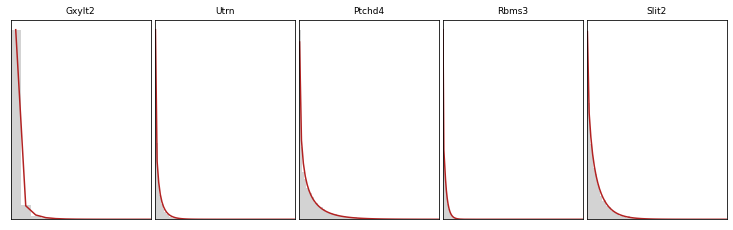

In [118]:
sr_arr[1].plot_gene_distributions(sd_arr[1],marg='nascent',sz=(1,5),figsize=(10,3),genes_to_plot = ~gf_naive)

In [594]:
gn_naive

array(['Gxylt2', 'Utrn', 'Ptchd4', 'Rbms3', 'Dlx6os1', 'Rab27b', 'Egln3',
       'Xylt1', 'Igf1', 'Slc39a10', 'Etv1', 'Mast3', 'Ptprz1', 'Gkap1',
       'Nr4a2', 'Igsf9b', 'Srgap1', 'Gm1976', 'Cacna2d2', 'Lmo7', 'Hmgcr',
       'Sv2b', 'Kctd1', 'Dgkz', 'Fam131a', 'Npas2', 'Frmd6', 'Atp2b4',
       'Kif26b', 'C530008M17Rik', 'Pacsin2', 'Erbin', 'Phf24', 'Lgi2',
       'Cacna2d1', 'Gfra2', 'Mapk4', 'Csmd2', 'Arpp21', 'Pou6f2', 'Tacc1',
       'Col19a1', 'Tox3', 'Chl1', 'Actn4', 'Meis2', 'Znrf3', 'Plpp4',
       'Ext1', 'Gsg1l', 'Rasgrp1', 'Eps8', 'Ptprk', 'Sv2c', 'Tcerg1l',
       'Hcn1'], dtype='<U16')

In [595]:
for i in range(3):
    print(len(set(gn_naive)))
    print(len(set(gn_naive).intersection(set(gn_params[i]))))

56
23
56
27
56
18


In [596]:
set(gn_params[0]).intersection(set(gn_params[1])).intersection(set(gn_params[2]))

{'Adgrg6', 'Caln1', 'Cyp51', 'Rims3', 'Tns1'}

In [597]:
len(set(gn_naive))

56

In [598]:
len((set(gn_params[0]).union(set(gn_params[1])).union(set(gn_params[2]))).intersection((gn_naive)))

45

In [599]:
set(gn_params[0]).intersection(set(gn_params[1])).intersection(set(gn_params[2]))#.intersection((gn_naive))

{'Adgrg6', 'Caln1', 'Cyp51', 'Rims3', 'Tns1'}

In [600]:
(set(gn_params[0]).union(set(gn_params[1])).union(set(gn_params[2]))).intersection((gn_naive))

{'Arpp21',
 'Atp2b4',
 'C530008M17Rik',
 'Cacna2d1',
 'Cacna2d2',
 'Chl1',
 'Dlx6os1',
 'Egln3',
 'Eps8',
 'Erbin',
 'Etv1',
 'Ext1',
 'Frmd6',
 'Gfra2',
 'Gkap1',
 'Gsg1l',
 'Hcn1',
 'Hmgcr',
 'Igf1',
 'Igsf9b',
 'Kctd1',
 'Kif26b',
 'Lgi2',
 'Lmo7',
 'Mapk4',
 'Mast3',
 'Meis2',
 'Nr4a2',
 'Phf24',
 'Plpp4',
 'Pou6f2',
 'Ptchd4',
 'Ptprk',
 'Ptprz1',
 'Rasgrp1',
 'Rbms3',
 'Slc39a10',
 'Srgap1',
 'Sv2b',
 'Sv2c',
 'Tacc1',
 'Tcerg1l',
 'Tox3',
 'Utrn',
 'Xylt1'}

In [237]:
# mydata = Data(x, y, wd=1./power(sx,2), we=1./power(sy,2))


/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Instead of comparing raw means, we can compare inferred means.

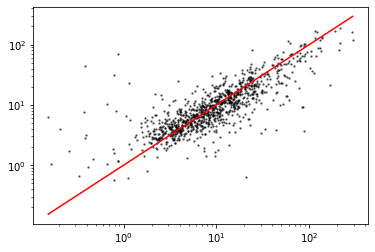

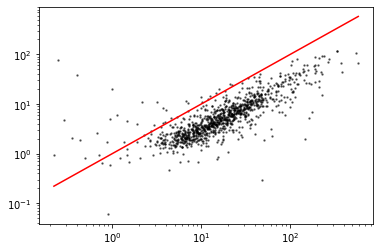

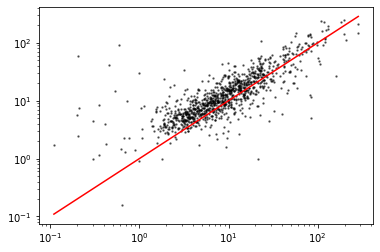

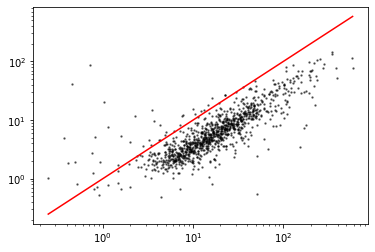

In [219]:
for i in range(4):
#     print(sr_arr[i*2-1].samp_optimum)
#     print(sr_arr[i*2].samp_optimum)
    m1 = [10**x[0]/10**x[2] for x in sr_arr[i*2-1].phys_optimum]
    m2 = [10**x[0]/10**x[2] for x in sr_arr[i*2].phys_optimum]
    plt.figure()
    plt.scatter(m1,m2,2,'k',alpha=0.5)
    xl = [min(m1),max(m1)]
    plt.plot(xl,xl,'r-')
    plt.xscale('log')
    plt.yscale('log')
#     (sr_arr[i*2-1],sr_arr[i*2],dir_string = dir_string,\
#                          distinguish_rej=True,plot_errorbars=True,meta = dataset_meta[i],xlabel = dataset_names[i*2-1],\
#                          ylabel = dataset_names[i*2])

In [ ]:
# for i in range(4):
#     plot_params_for_pair(sr_arr[i*2-1],sr_arr[i*2],dir_string = dir_string,\
#                          distinguish_rej=True,plot_errorbars=True,meta = dataset_meta[i])

Another one! but with delay now

INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Directory ./fits/gg_220420_020_nuc_1/brain_5k_v3/Delay_None_1x1 created.
INFO:root:Global inference parameters stored to ./fits/gg_220420_020_nuc_1/brain_5k_v3/Delay_None_1x1/parameters.pr.
INFO:root:Beginning data extraction.
INFO:root:Dataset: brain_5k_v3


/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_220420_020_nuc_1/genes.csv.
INFO:root:Search data stored to ./fits/gg_220420_020_nuc_1/brain_5k_v3/raw.sd.
INFO:root:Starting non-parallelized grid scan.
DEBUG:root:Grid point 0 results stored to ./fits/gg_220420_020_nuc_1/brain_5k_v3/Delay_None_1x1/grid_point_0.gp.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220420_020_nuc_1/brain_5k_v3/Delay_None_1x1/analysis_figures created.
DEBUG:root:Grid scan results stored to ./fits/gg_220420_020_nuc_1/brain_5k_v3/Delay_None_1x1/grid_scan_results.res.
INFO:root:Runtime: 51.5 seconds.
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Directory ./fits/gg_220420_020_nuc_1/brain_nuc_5k_v3/Delay_None_1x1 created.
INFO:root:Global inference parameters stored to ./fits/gg_220420_020_nuc_1/brain_nuc_5k_v3/De

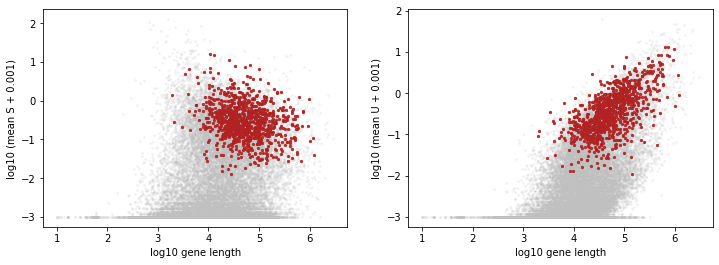

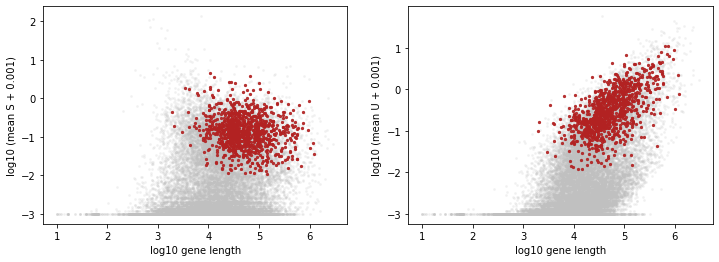

In [32]:
from cme_toolbox import CMEModel
fitmodel = CMEModel('Delay','None')
# fitmodel = CMEModel('Bursty','Poisson')
from inference import InferenceParameters, GradientInference


result_strings_del = []
for j in range(2):
    inference_parameters = InferenceParameters([-1, -1.8, -1.8 ],\
                [4.2, 2.5, 3.5],[-8, -3.5],[-3, 1],[15,15],\
                dataset_strings[j],fitmodel,use_lengths = False)
    search_data = extract_data(loom_filepaths[j], transcriptome_filepath, dataset_names[j],
                        dataset_strings[j], dir_string, dataset_attr_names=attribute_names)
    search_data_arr.append(search_data)
    full_result_string = inference_parameters.fit_all_grid_points(1,search_data)
    result_strings_del.append(full_result_string)

DEBUG:root:Grid scan results loaded from ./fits/gg_220420_020_nuc_1/brain_5k_v3/Delay_None_1x1/grid_scan_results.res.
(1.0, 1.0)
INFO:root:Figure stored to ./fits/gg_220420_020_nuc_1/brain_5k_v3/Delay_None_1x1/analysis_figures/kldiv.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INFO:root:Figure stored to ./fits/gg_220420_020_nuc_1/brain_5k_v3/Delay_None_1x1/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 102 genes out of 1000. Runtime: 0.9 seconds.
INFO:root:Computing local Hessian.
INFO:root:Gene 29 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 149 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 158 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 287 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 338 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 409 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 458 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 636 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 713 gives negative stdev; replaced with mean. (Search converged to loc

/home/ggorin/projects/seq-cme-technoise/inference.py:502: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index,:] = np.sqrt(np.diag(hess_inv))/np.sqrt(self.n_cells)


INFO:root:Figure stored to ./fits/gg_220420_020_nuc_1/brain_5k_v3/Delay_None_1x1/analysis_figures/length_dependence.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4154: RuntimeWarning: overflow encountered in double_scalars
  fac1 = a / np.pi * np.exp(gamma)
/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4154: RuntimeWarning: overflow encountered in exp
  fac1 = a / np.pi * np.exp(gamma)


INFO:root:Figure stored to ./fits/gg_220420_020_nuc_1/brain_5k_v3/Delay_None_1x1/analysis_figures/parameter_marginals.png.
DEBUG:root:Grid scan results loaded from ./fits/gg_220420_020_nuc_1/brain_nuc_5k_v3/Delay_None_1x1/grid_scan_results.res.
(1.0, 1.0)
INFO:root:Figure stored to ./fits/gg_220420_020_nuc_1/brain_nuc_5k_v3/Delay_None_1x1/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220420_020_nuc_1/brain_nuc_5k_v3/Delay_None_1x1/analysis_figures/gene_distributions_joint.png.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 445 genes out of 1000. Runtime: 0.9 seconds.
INFO:root:Computing local Hessian.
INFO:root:Gene 158 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 171 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 233 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 287 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 338 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 409 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 723 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Standard error of the MLE computation complete. Runtime: 176.7 seconds.


/home/ggorin/projects/seq-cme-technoise/inference.py:502: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index,:] = np.sqrt(np.diag(hess_inv))/np.sqrt(self.n_cells)


INFO:root:Figure stored to ./fits/gg_220420_020_nuc_1/brain_nuc_5k_v3/Delay_None_1x1/analysis_figures/length_dependence.png.
INFO:root:Figure stored to ./fits/gg_220420_020_nuc_1/brain_nuc_5k_v3/Delay_None_1x1/analysis_figures/parameter_marginals.png.


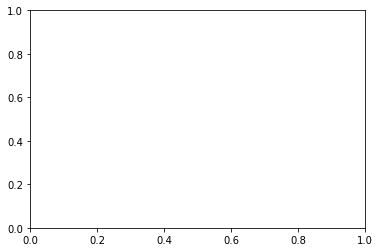

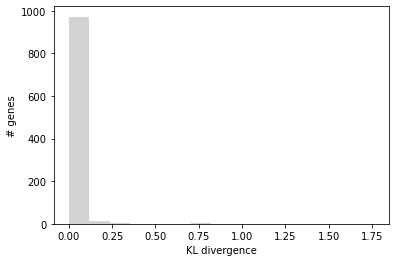

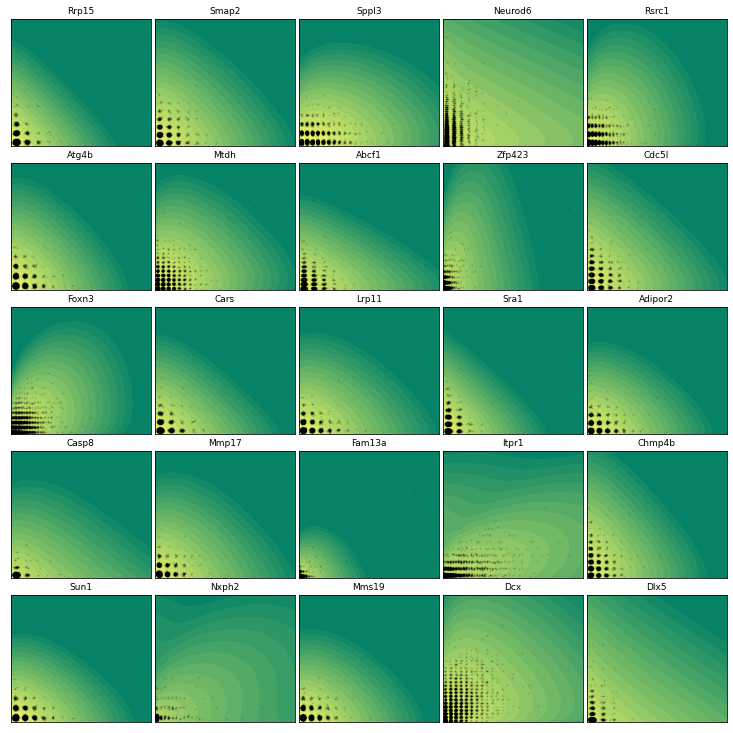

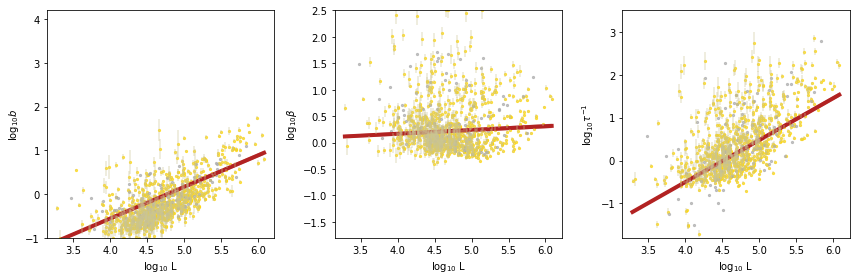

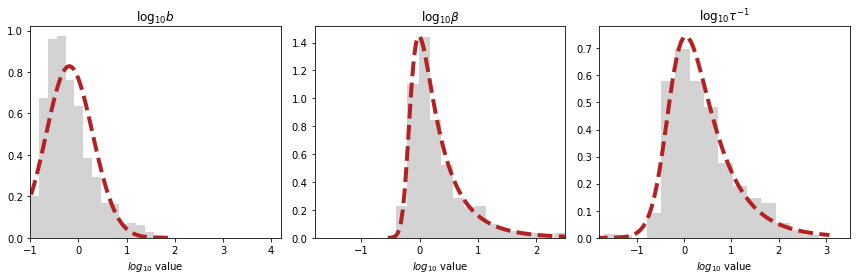

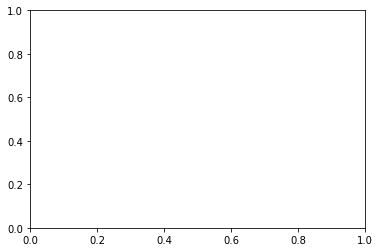

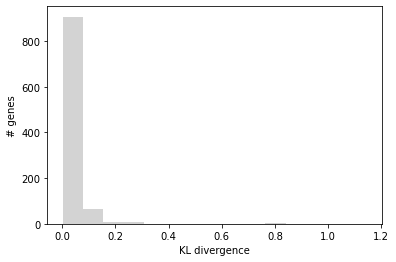

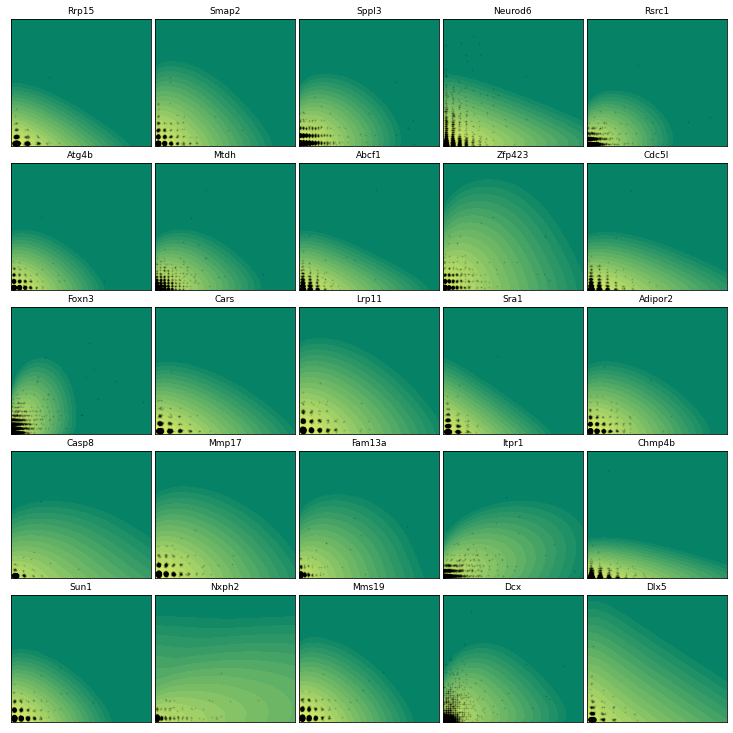

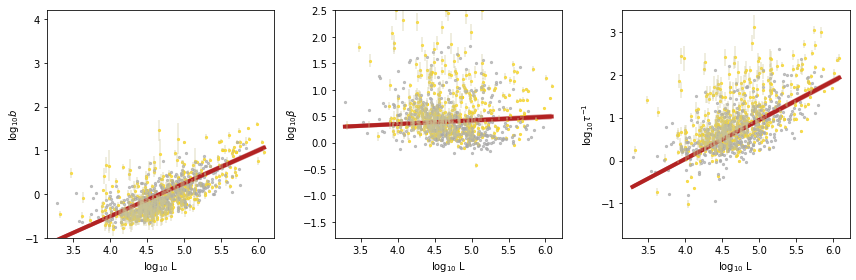

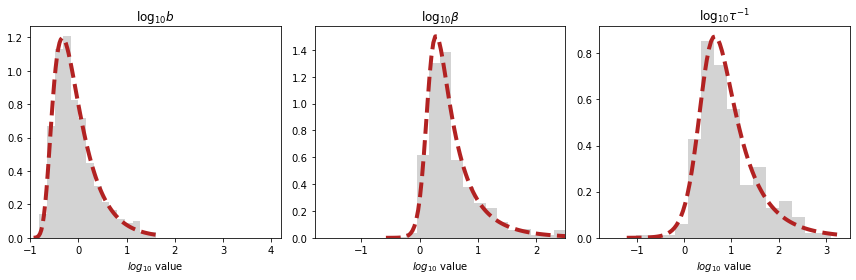

In [33]:
sr_del_arr = []
sd_arr = search_data_arr

for j in range(2):
    sr = load_search_results(result_strings_del[j])
    # sd = load_search_data(search_data_strings[j])
    sd = sd_arr[j]
    fig1,ax1 = plt.subplots(1,1)
    sr.find_sampling_optimum()

    print(sr.samp_optimum)
    
    
    fig1,ax1 = plt.subplots(1,1)
    sr.plot_KL(ax1)
    
    sr.plot_gene_distributions(sd,marg='joint')
    
    _=sr.chisquare_testing(sd)
    
    #these do not make sense to do for a single "virtual" grid point
#     sr.resample_opt_viz(sd)
#     sr.resample_opt_mc_viz(sd)
#     sr.chisq_best_param_correction(sd,viz=False) 
#     print(sr.samp_optimum_ind)

    sr.compute_sigma(sd)
    sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
    sr.plot_param_marg()
    
    sr_del_arr.append(sr)

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INFO:root:Figure stored to ./fits/gg_220420_020_nuc_1/analysis_figures/pair_parameter_comparison_12.png.


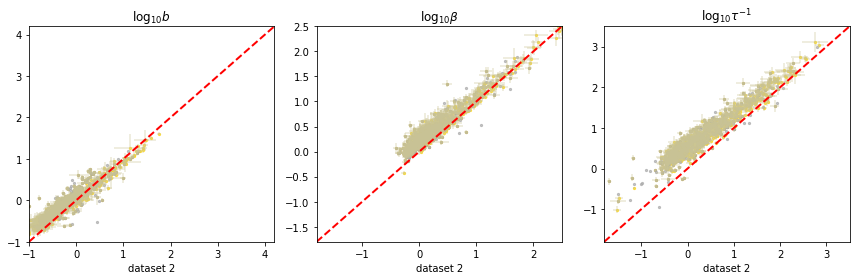

In [34]:
plot_params_for_pair(sr_del_arr[0],sr_del_arr[1],dir_string = dir_string,\
                     distinguish_rej=True,plot_errorbars=True)

Text(0.5, 0, 'Markov model')

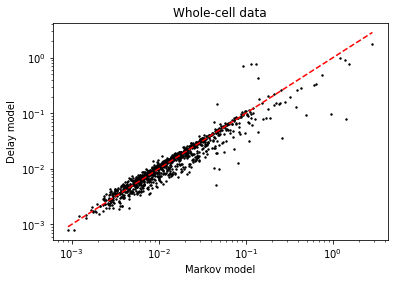

In [38]:
sr1_klds = sr_arr[0].klds[sr_arr[0].samp_optimum_ind]
sr1_del_klds = sr_del_arr[0].klds[sr_del_arr[0].samp_optimum_ind]
plt.scatter(sr1_klds,sr1_del_klds,2,'k')
plt.xscale('log')
plt.yscale('log')
xl = [min(sr1_klds),max(sr1_klds)]
plt.plot(xl,xl,'r--')
plt.title('Whole-cell data')
plt.ylabel('Delay model')
plt.xlabel('Markov model')

Text(0.5, 0, 'Markov model')

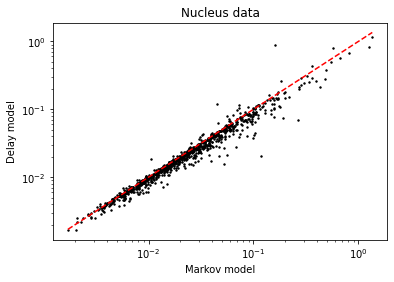

In [36]:
sr2_klds = sr_arr[1].klds[sr_arr[1].samp_optimum_ind]
sr2_del_klds = sr_del_arr[1].klds[sr_del_arr[1].samp_optimum_ind]
plt.scatter(sr2_klds,sr2_del_klds,2,'k')
plt.xscale('log')
plt.yscale('log')
xl = [min(sr2_klds),max(sr2_klds)]
plt.plot(xl,xl,'r--')
plt.title('Nucleus data')
plt.ylabel('Delay model')
plt.xlabel('Markov model')

In [145]:
search_data_strings = ['./fits/gg_220410_020_nuc_2/brain_5k_v3/raw.sd',\
                       './fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/raw.sd']

In [146]:
# search_data = load_search_data(search_data_strings[0])

In [147]:
from cme_toolbox import CMEModel
fitmodel_del = CMEModel('Delay','Poisson')
from inference import InferenceParameters, GradientInference


result_strings_del = []
# search_data_arr_del = []
for j in range(2):
    inference_parameters = InferenceParameters([-1, -1.8, -1.8 ],\
                [4.2, 2.5, 3.5],[-8, -3.5],[-3, 1 ],[15,15],\
                dataset_strings[j],fitmodel_del)
    search_data = load_search_data(search_data_strings[j])
#     search_data_arr_del = extract_data(loom_filepaths[j], transcriptome_filepath, dataset_names[j],
#                         dataset_strings[j], dir_string, dataset_attr_names=attribute_names)
#     search_data_arr.append(search_data)
    full_result_string = inference_parameters.fit_all_grid_points(40,search_data,fitmodel_del)
    result_strings_del.append(full_result_string)

INFO:root:Directory ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15 created.
INFO:root:Global inference parameters stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/parameters.pr.
INFO:root:Search data loaded from ./fits/gg_220410_020_nuc_2/brain_5k_v3/raw.sd.
INFO:root:Starting parallelized grid scan.
DEBUG:root:Grid point 74 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_74.gp.
DEBUG:root:Grid point 22 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_22.gp.
DEBUG:root:Grid point 20 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_20.gp.
DEBUG:root:Grid point 38 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_38.gp.
DEBUG:root:Grid point 44 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_44.gp.
DEBUG:root:Grid point 4 results stored to ./fits/gg_220410_020_nuc

DEBUG:root:Grid point 43 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_43.gp.
DEBUG:root:Grid point 9 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_9.gp.
DEBUG:root:Grid point 25 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_25.gp.
DEBUG:root:Grid point 27 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_27.gp.
DEBUG:root:Grid point 45 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_45.gp.
DEBUG:root:Grid point 11 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_11.gp.
DEBUG:root:Grid point 47 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_47.gp.
DEBUG:root:Grid point 31 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_31.gp.
DEBUG:root:Grid point 13 results stored to

DEBUG:root:Grid point 160 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_160.gp.
DEBUG:root:Grid point 111 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_111.gp.
DEBUG:root:Grid point 120 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_120.gp.
DEBUG:root:Grid point 158 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_158.gp.
DEBUG:root:Grid point 176 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_176.gp.
DEBUG:root:Grid point 105 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_105.gp.
DEBUG:root:Grid point 93 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_93.gp.
DEBUG:root:Grid point 145 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_145.gp.
DEBUG:root:Grid point 127 

DEBUG:root:Grid point 171 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_171.gp.
DEBUG:root:Grid point 212 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_212.gp.
DEBUG:root:Grid point 187 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_187.gp.
DEBUG:root:Grid point 221 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_221.gp.
DEBUG:root:Grid point 203 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_203.gp.
DEBUG:root:Grid point 210 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_210.gp.
DEBUG:root:Grid point 195 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_195.gp.
DEBUG:root:Grid point 153 results stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_point_153.gp.
DEBUG:root:Grid point 13

DEBUG:root:Grid point 12 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_12.gp.
DEBUG:root:Grid point 60 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_60.gp.
DEBUG:root:Grid point 59 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_59.gp.
DEBUG:root:Grid point 71 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_71.gp.
DEBUG:root:Grid point 21 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_21.gp.
DEBUG:root:Grid point 19 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_19.gp.
DEBUG:root:Grid point 5 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_5.gp.
DEBUG:root:Grid point 73 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_73.gp.
DEBUG:root

DEBUG:root:Grid point 126 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_126.gp.
DEBUG:root:Grid point 108 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_108.gp.
DEBUG:root:Grid point 106 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_106.gp.
DEBUG:root:Grid point 89 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_89.gp.
DEBUG:root:Grid point 144 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_144.gp.
DEBUG:root:Grid point 124 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_124.gp.
DEBUG:root:Grid point 122 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_122.gp.
DEBUG:root:Grid point 119 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_11

DEBUG:root:Grid point 170 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_170.gp.
DEBUG:root:Grid point 168 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_168.gp.
DEBUG:root:Grid point 139 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_139.gp.
DEBUG:root:Grid point 186 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_186.gp.
DEBUG:root:Grid point 159 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_159.gp.
DEBUG:root:Grid point 224 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_224.gp.
DEBUG:root:Grid point 209 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_209.gp.
DEBUG:root:Grid point 161 results stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_point_

DEBUG:root:Grid scan results loaded from ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/grid_scan_results.res.
INFO:root:Figure stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/analysis_figures/landscape.png.
(-5.857142857142858, -0.9285714285714284)
INFO:root:Figure stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/analysis_figures/gene_distributions_joint.png.
INFO:root:Original optimum: -5.86, -0.93.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 87 genes out of 1000. Runtime: 0.4 seconds.
INFO:root:New optimum: -5.86, -0.93.
INFO:root:Chi-square computation complete. Rejected 87 genes out of 1000. Runtime: 0.4 seconds.
INFO:root:New optimum: -5.86, -0.93.
INFO:root:Chi-square computation complete. Rejected 87 genes out of 1000. Runtime: 0.4 seconds.
INFO:root:New optimum: -5.86, -0.93.
INFO:root:Chi-square computation complete. Rejected 87 genes out of 1000. Runtime: 0.4 seconds.
INFO:root:New optimum: -5.86, -0.93.
INFO:root:Chi-square computation complete. Rejected 87 genes out of 1000. Runtime: 0.4 seconds.
INFO:root:New optimum: -5.86, -0.93.
INFO:root:Chi-square computation complete. Rejected 87 genes out of 1000. Runtime: 0.4 seconds.
INFO:root:New optimum: -5.86, -0.93.
INFO:root:Chi-square computation complete. Rejected 87 genes out of 1000. Runtime: 0.4 seconds.
INFO:root:New optimum: -5.86, -0.93.
INFO:root:Chi-square computation complete. Rejected 87 genes out of 1

/home/ggorin/projects/seq-cme-technoise/inference.py:470: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index,:] = np.sqrt(np.diag(hess_inv))/np.sqrt(search_data.n_cells)


INFO:root:Figure stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/analysis_figures/length_dependence.png.
INFO:root:Figure stored to ./fits/gg_220410_020_nuc_2/brain_5k_v3/Delay_Poisson_15x15/analysis_figures/parameter_marginals.png.
DEBUG:root:Grid scan results loaded from ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/grid_scan_results.res.
INFO:root:Figure stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/analysis_figures/landscape.png.
(-6.214285714285714, -0.6071428571428568)
INFO:root:Figure stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/analysis_figures/gene_distributions_joint.png.
INFO:root:Original optimum: -6.21, -0.61.


/home/ggorin/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


INFO:root:Chi-square computation complete. Rejected 435 genes out of 1000. Runtime: 0.5 seconds.
INFO:root:New optimum: -5.86, -0.61.
INFO:root:Chi-square computation complete. Rejected 449 genes out of 1000. Runtime: 0.8 seconds.
INFO:root:New optimum: -5.86, -0.61.
INFO:root:Chi-square computation complete. Rejected 449 genes out of 1000. Runtime: 0.5 seconds.
INFO:root:New optimum: -5.86, -0.61.
INFO:root:Chi-square computation complete. Rejected 449 genes out of 1000. Runtime: 0.5 seconds.
INFO:root:New optimum: -5.86, -0.61.
INFO:root:Chi-square computation complete. Rejected 449 genes out of 1000. Runtime: 0.5 seconds.
INFO:root:New optimum: -5.86, -0.61.
INFO:root:Chi-square computation complete. Rejected 449 genes out of 1000. Runtime: 0.5 seconds.
INFO:root:New optimum: -5.86, -0.61.
INFO:root:Chi-square computation complete. Rejected 449 genes out of 1000. Runtime: 0.5 seconds.
INFO:root:New optimum: -5.86, -0.61.
INFO:root:Chi-square computation complete. Rejected 449 genes 

/home/ggorin/projects/seq-cme-technoise/inference.py:470: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index,:] = np.sqrt(np.diag(hess_inv))/np.sqrt(search_data.n_cells)


INFO:root:Figure stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/analysis_figures/length_dependence.png.
INFO:root:Figure stored to ./fits/gg_220410_020_nuc_2/brain_nuc_5k_v3/Delay_Poisson_15x15/analysis_figures/parameter_marginals.png.


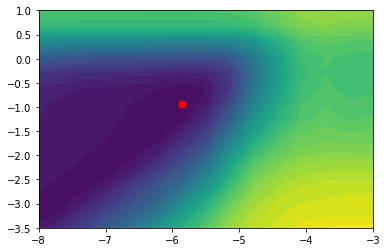

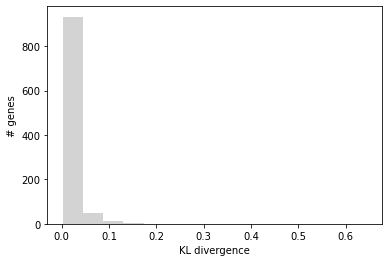

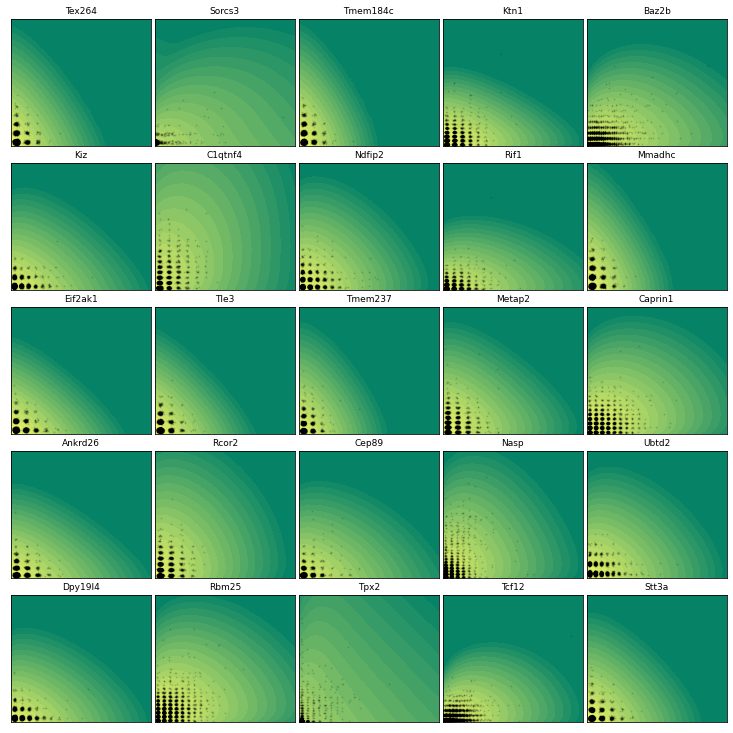

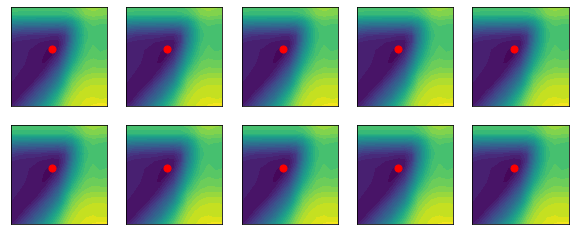

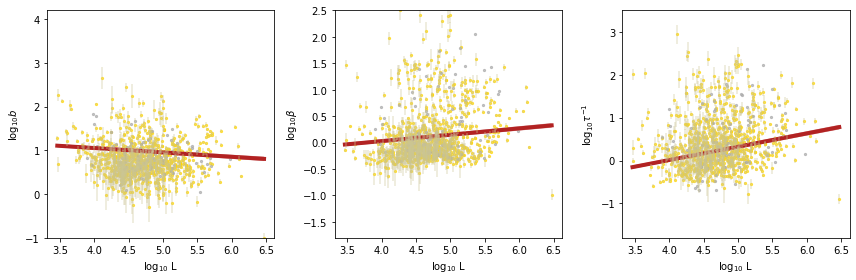

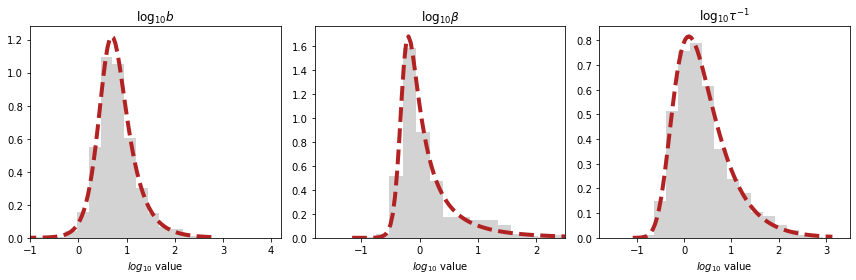

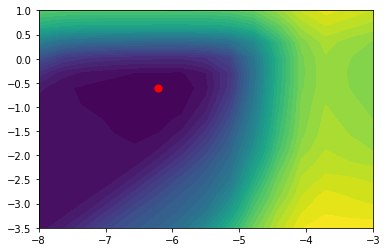

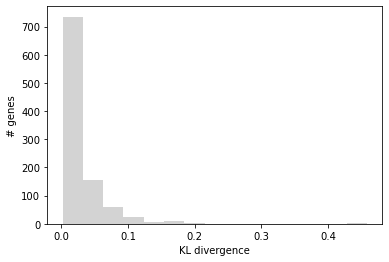

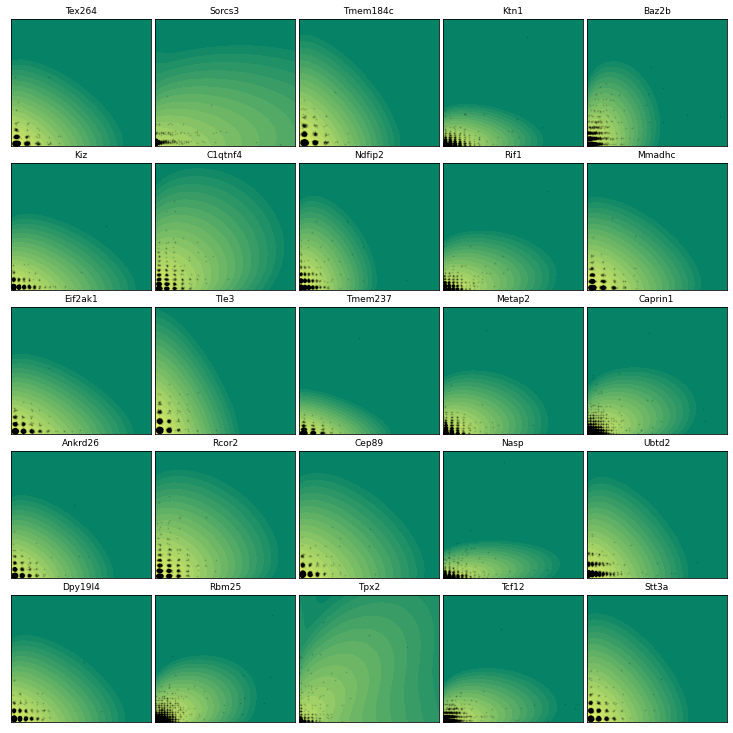

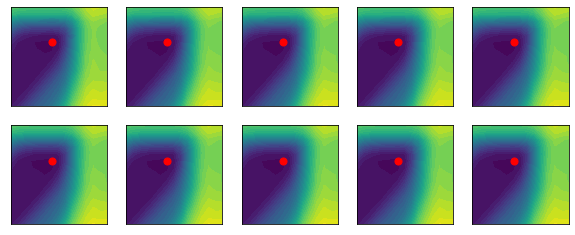

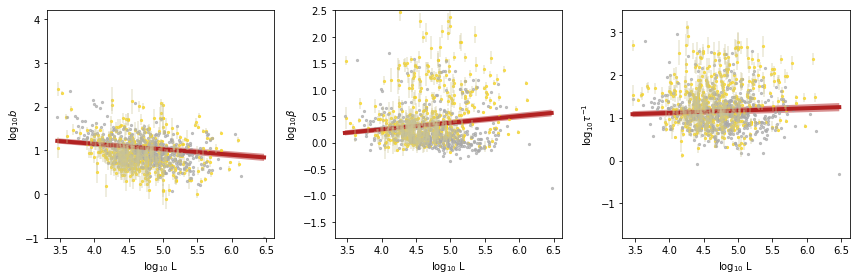

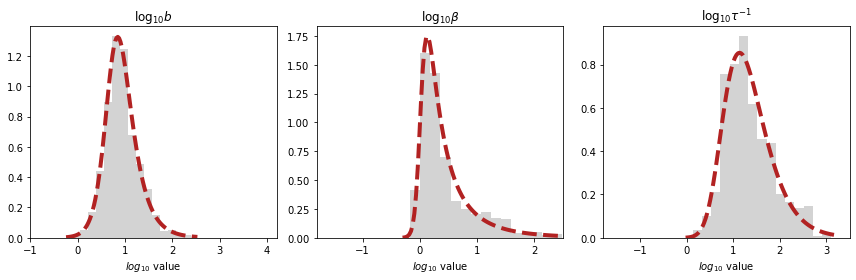

In [148]:
sr_del_arr = []
sd_arr = search_data_arr

for j in range(2):
    sr = load_search_results(result_strings_del[j])
    # sd = load_search_data(search_data_strings[j])
    sd = sd_arr[j]
    fig1,ax1 = plt.subplots(1,1)
    sr.find_sampling_optimum()
    sr.plot_landscape(ax1,savefig=True)
    print(sr.samp_optimum)
#     plot_param_L_dep(sr,sd)
    
    fig1,ax1 = plt.subplots(1,1)
    sr.plot_KL(ax1)
    
    plot_gene_distributions(sr,sd,marg='joint')
    
#     _=sr.chisquare_testing(sd)
    
    
#     sr.resample_opt_viz(sd)
    
#     sr.resample_opt_mc_viz(sd)
    sr.chisq_best_param_correction(sd)
    print(sr.samp_optimum_ind)
    sr.compute_sigma(sd)
    plot_param_L_dep(sr,sd,plot_errorbars=True,plot_fit=True)
    sr.plot_param_marg()
    
    sr_del_arr.append(sr)

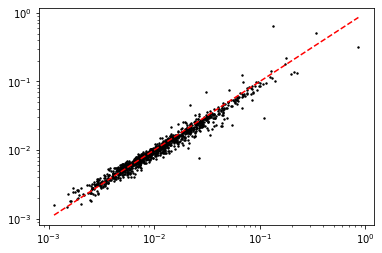

In [167]:
sr1_klds = sr_arr[0].klds[sr_arr[0].samp_optimum_ind]
sr1_del_klds = sr_del_arr[0].klds[sr_del_arr[0].samp_optimum_ind]
plt.scatter(sr1_klds,sr1_del_klds,2,'k')
plt.xscale('log')
plt.yscale('log')
xl = [min(sr1_klds),max(sr1_klds)]
plt.plot(xl,xl,'r--')


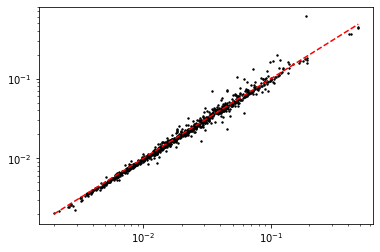

In [168]:
sr2_klds = sr_arr[1].klds[sr_arr[1].samp_optimum_ind]
sr2_del_klds = sr_del_arr[1].klds[sr_del_arr[1].samp_optimum_ind]
plt.scatter(sr2_klds,sr2_del_klds,2,'k')
plt.xscale('log')
plt.yscale('log')
xl = [min(sr2_klds),max(sr2_klds)]
plt.plot(xl,xl,'r--')

INFO:root:Figure stored to ./fits/gg_220410_020_nuc_1/brain_nuc_5k_v3/Delay_Poisson_15x15/analysis_figures/length_dependence.png.


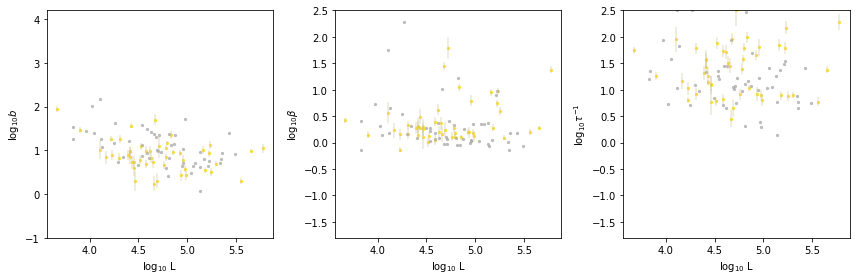

In [129]:
plot_param_L_dep(sr,sd,plot_errorbars=True,plot_fit=False,distinguish_rej=True)

In [120]:
# def plot_param_L_dep_(search_results,search_data,gene_filter = None,\
#                      plot_errorbars=False,\
#                      figsize=(12,4),c=2.576,\
#                      axis_search_bounds = True, plot_fit = False,\
#                      distinguish_rej = True):
#     fig1,ax1=plt.subplots(nrows=1,ncols=3,figsize=figsize)

#     if gene_filter is None:
#         gene_filter = np.ones(search_results.phys_optimum.shape[0],dtype=bool)
#         gene_filter_rej = np.zeros(search_results.phys_optimum.shape[0],dtype=bool)
#     else:
#         if gene_filter.dtype != np.bool:
#             gf_temp = np.zeros(search_results.phys_optimum.shape[0],dtype=bool)
#             gf_temp[gene_filter] = True
#             gene_filter = gf_temp
#             gene_filter_rej = np.zeros(search_results.phys_optimum.shape[0],dtype=bool) #something like this...

#     if distinguish_rej: #default
#         if hasattr(search_results,'rejected_genes'):
#             if search_results.rejection_index != search_results.samp_optimum_ind:
#                 log.warning('Sampling parameter value is inconsistent.')
#                 distinguish_rej = False
#             else: #if everything is ready
#                 gene_filter_rej =  np.logical_and(gene_filter,search_results.rejected_genes)
#                 gene_filter = np.logical_and(gene_filter,~search_results.rejected_genes)
#                 acc_point_aesth = ('accepted_gene_color','accepted_gene_alpha','accepted_gene_ms')
#                 rej_point_aesth = ('rejected_gene_color','rejected_gene_alpha','rejected_gene_ms')
#         else:
#             log.info('Gene rejection needs to be precomputed to distinguish rejected points.')
#             distinguish_rej = False

#     if not distinguish_rej: #don't distinguish
#         acc_point_aesth = ('generic_gene_color','generic_gene_alpha','generic_gene_ms')
#         # gene_filter = np.ones(search_results.phys_optimum.shape[0],dtype=bool)
#         log.info('Falling back on generic marker properties.') 

#     for i in range(3):
#         if plot_errorbars:
#             # raise ValueError('I still need to implement this.')

#             lfun = lambda x,a,b: a*x+b
#             if plot_fit:
# 	            popt,pcov = scipy.optimize.curve_fit(lfun,search_data.gene_log_lengths[gene_filter],
# 	                                                 search_results.phys_optimum[gene_filter,i],\
#                                                      sigma=search_results.sigma[gene_filter,i],
# 	                                                 absolute_sigma=True)
# 	            xl = np.array([min(search_data.gene_log_lengths),max(search_data.gene_log_lengths)])

# 	            min_param = (popt[0]-np.sqrt(pcov[0,0])*c,popt[1]-np.sqrt(pcov[1,1])*c)
# 	            max_param = (popt[0]+np.sqrt(pcov[0,0])*c,popt[1]+np.sqrt(pcov[1,1])*c)
# 	            ax1[i].fill_between(xl,\
# 	            	lfun(xl,min_param[0],min_param[1]),\
# 	            	lfun(xl,max_param[0],max_param[1]),\
# 	            	facecolor=aesthetics['length_fit_face_color'],\
# 	            	alpha=aesthetics['length_fit_face_alpha'])
# 	            ax1[i].plot(xl,lfun(xl,popt[0],popt[1]),\
# 	            	c=aesthetics['length_fit_line_color'],\
# 	            	linewidth=aesthetics['length_fit_lw'])
#             ax1[i].errorbar(search_data.gene_log_lengths[gene_filter],
#                             search_results.phys_optimum[gene_filter,i],
#                             search_results.sigma[gene_filter,i]*c,c=aesthetics['errorbar_gene_color'],
#                             alpha=aesthetics['errorbar_gene_alpha'],linestyle='None',
#                             linewidth = aesthetics['errorbar_lw'])

#         ax1[i].scatter(search_data.gene_log_lengths[gene_filter],
#                         search_results.phys_optimum[gene_filter,i],\
#                        c=aesthetics[acc_point_aesth[0]],\
#                        alpha=aesthetics[acc_point_aesth[1]],\
#                        s=aesthetics[acc_point_aesth[2]])

#         if np.any(gene_filter_rej):
#             ax1[i].scatter(search_data.gene_log_lengths[gene_filter_rej],
#                 search_results.phys_optimum[gene_filter_rej,i],\
#                c=aesthetics[rej_point_aesth[0]],\
#                alpha=aesthetics[rej_point_aesth[1]],\
#                s=aesthetics[rej_point_aesth[2]])

#         ax1[i].set_xlabel(r'$\log_{10}$ L')
#         ax1[i].set_ylabel(search_results.model.get_log_name_str()[i])
#         if axis_search_bounds:
#             ax1[i].set_ylim([search_results.phys_lb[i],search_results.phys_ub[i]])
#     fig1.tight_layout()
#     fig_string = search_results.analysis_figure_string+'/length_dependence.png'
#     plt.savefig(fig_string)
#     log.info('Figure stored to {}.'.format(fig_string))

In [98]:
gene_filter = np.ones(sr.phys_optimum.shape[0],dtype=bool)

In [99]:
np.logical_and(gene_filter,~sr.rejected_genes)

array([ True,  True,  True, False, False, False,  True, False, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True, False,
        True, False, False,  True,  True, False,  True, False, False,
        True, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True,  True,  True,
        True])

In [101]:
np.logical_and(gene_filter,sr.rejected_genes)

array([False, False, False,  True,  True,  True, False,  True,  True,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False,  True,  True, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True, False,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False])

In [102]:
aesthetics

{'generic_gene_color': 'dimgray',
 'accepted_gene_color': 'gold',
 'rejected_gene_color': 'darkgrey',
 'generic_gene_alpha': 0.5,
 'accepted_gene_alpha': 0.7,
 'rejected_gene_alpha': 0.7,
 'generic_gene_ms': 10,
 'accepted_gene_ms': 5,
 'rejected_gene_ms': 5,
 'hist_face_color': 'lightgray',
 'hist_fit_color': 'firebrick',
 'hist_fit_lw': 4,
 'errorbar_gene_color': [0.796078431372549,
  0.7725490196078432,
  0.5843137254901961],
 'errorbar_gene_alpha': 0.3,
 'errorbar_lw': 2,
 'length_fit_line_color': 'firebrick',
 'length_fit_face_color': 'firebrick',
 'length_fit_face_alpha': 0.5,
 'length_fit_lw': 4}

In [45]:
# def plot_params_for_pair(sr1,sd1,sr2,gene_filter = None,\
#                      plot_errorbars=False,\
#                      figsize=(12,4),c=2.576,\
#                      axis_search_bounds = True,
#                      distinguish_rej = True,
#                      plot_identity = True):
#     fig1,ax1=plt.subplots(nrows=1,ncols=3,figsize=figsize)

#     if gene_filter is None:
#         gene_filter = np.ones(sr1.phys_optimum.shape[0],dtype=bool)
#         gene_filter_rej = ~gene_filter
#     else:
#         if gene_filter.dtype != np.bool:
#             gf_temp = np.zeros(sr1.phys_optimum.shape[0],dtype=bool)
#             gf_temp[gene_filter] = True
#             gene_filter = gf_temp
#             gene_filter_rej = np.zeros(search_results.phys_optimum.shape[0],dtype=bool) #something like this...

#     if distinguish_rej: #default
#         if hasattr(sr1,'rejected_genes') and hasattr(sr2,'rejected_genes'):
#             if sr1.rejection_index != sr1.samp_optimum_ind:
#                 log.warning('Sampling parameter value is inconsistent.')
#                 distinguish_rej = False
#             elif sr2.rejection_index != sr2.samp_optimum_ind:
#                 log.warning('Sampling parameter value is inconsistent.')
#                 distinguish_rej = False
#             else: #if everything is ready
#                 gene_filter = np.logical_and(gene_filter,~sr1.rejected_genes,~sr2.rejected_genes)
#                 gene_filter_rej =  np.logical_and(gene_filter,np.logical_or(sr1.rejected_genes,sr2.rejected_genes))
#                 acc_point_aesth = ('accepted_gene_color','accepted_gene_alpha','accepted_gene_ms')
#                 rej_point_aesth = ('rejected_gene_color','rejected_gene_alpha','rejected_gene_ms')
#         else:
#             log.info('Gene rejection needs to be precomputed to distinguish rejected points.')
#             distinguish_rej = False

#     if not distinguish_rej: #don't distinguish
#         acc_point_aesth = ('generic_gene_color','generic_gene_alpha','generic_gene_ms')
#         log.info('Falling back on generic marker properties.') 

#     for i in range(3):
#         if plot_errorbars:
#             ax1[i].errorbar(sr1.phys_optimum[gene_filter,i],\
#                             sr2.phys_optimum[gene_filter,i],\
#                             sr1.sigma[gene_filter,i]*c,\
#                             sr2.sigma[gene_filter,i]*c,\
#                             c=aesthetics['errorbar_gene_color'],
#                             alpha=aesthetics['errorbar_gene_alpha'],\
#                             linestyle='None',
#                             linewidth = aesthetics['errorbar_lw'])
#         ax1[i].scatter(sr1.phys_optimum[gene_filter,i],
#                        sr2.phys_optimum[gene_filter,i],\
#                        c=aesthetics[acc_point_aesth[0]],\
#                        alpha=aesthetics[acc_point_aesth[1]],\
#                        s=aesthetics[acc_point_aesth[2]])
#         if np.any(gene_filter_rej):
#             ax1[i].scatter(sr1.phys_optimum[gene_filter_rej,i],
#                            sr2.phys_optimum[gene_filter_rej,i],\
#                c=aesthetics[rej_point_aesth[0]],\
#                alpha=aesthetics[rej_point_aesth[1]],\
#                s=aesthetics[rej_point_aesth[2]])

#         ax1[i].set_xlabel(r'dataset 1')
#         ax1[i].set_xlabel(r'dataset 2')
#         ax1[i].set_title(sr1.model.get_log_name_str()[i])
#         if axis_search_bounds:
#             ax1[i].set_xlim([sr1.phys_lb[i],sr1.phys_ub[i]])
#             ax1[i].set_ylim([sr1.phys_lb[i],sr1.phys_ub[i]])
#         if plot_identity:
#             xl = ax1[i].get_xlim()
#             ax1[i].plot(xl,xl,'r--',linewidth=2)
#     fig1.tight_layout()
#     fig_string = dir_string+'/analysis_figures/comparison.png'
#     plt.savefig(fig_string)
#     log.info('Figure stored to {}.'.format(fig_string))

/home/ggorin/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [190]:
# plot_params_for_pair(sr_arr[0],sd_arr[0],sr_arr[1],distinguish_rej=True,plot_errorbars=True)

In [191]:
# # you can do this but it looks like trash
# def find_most_concordant_samp(sr1,sr2):
#     discordance = ((sr1.param_estimates - sr2.param_estimates)**2).sum(2).sum(1)
#     srt =  np.argsort(discordance)
#     samp_concordant_ind = srt[0]
#     sr1.set_sampling_optimum(samp_concordant_ind)
#     sr2.set_sampling_optimum(samp_concordant_ind)

#     log.info('Optimum set to at {:.2f}, {:.2f}.'.format(sr1.samp_optimum[0],sr1.samp_optimum[1]))
#     return sr1.samp_optimum

INFO:root:Figure stored to ./fits/gg_220410_020_batch_1/analysis_figures/pair_parameter_comparison.png.


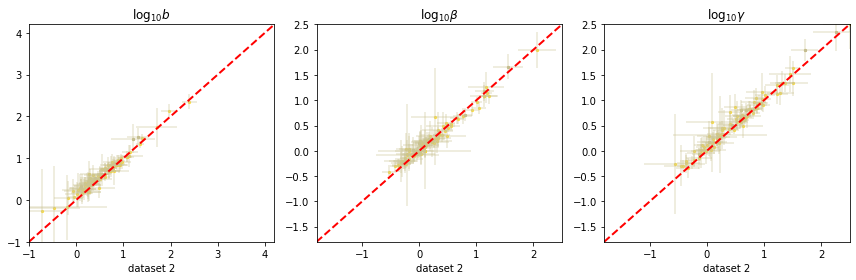

In [54]:
# find_most_concordant_samp(sr_arr[0],sr_arr[1])
plot_params_for_pair(sr_arr[0],sd_arr[0],sr_arr[1],analysis_dir_string='./fits/gg_220410_020_batch_1/analysis_figures',\
                     distinguish_rej=True,plot_errorbars=True)

In [180]:
# aesthetics['errorbar_gene_color']

In [ ]:
x = zip(range(inference_parameters.n_grid_points),[[search_data,fitmodel]]*inference_parameters.n_grid_points)

In [ ]:
import pickle


In [ ]:
grid_point_result_string = './gg_220409_020_batch_1/pbmc_1k_fbc/Bursty_Poisson_2x2/grid_point_0.gp'
with open(grid_point_result_string,'rb') as ipfs:
    grid_point_results = pickle.load(ipfs)
# grid_point_results = pickle.load('./gg_220409_020_batch_1/pbmc_1k_fbc/Bursty_Poisson_3x3/grid_point_0.gp')

In [ ]:

for y in x:
    point_index,[sd,model]= y
    break

In [ ]:
point_index

0

In [ ]:
grad_inference = GradientInference(inference_parameters,search_data,fitmodel,0)

In [ ]:
grad_inference.fit_all_genes(fitmodel,search_data)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


DEBUG:root:Grid point 0 results stored to ./gg_220409_020_batch_1/pbmc_1k_fbc/grid_point_0.


In [ ]:
grad_inference.param_MoM[:10]

In [ ]:
param_estimates[:10]

In [ ]:
transcriptome_dict = get_transcriptome(transcriptome_filepath)

In [ ]:
j=0
_,_,names,_ = import_vlm(loom_filepaths[j],*attribute_names[j])

In [ ]:
names

array(['DDX11L1', 'WASH7P', 'MIR6859-1', ..., 'AC007325.1', 'AC007325.4',
       'AC007325.2'], dtype=object)

In [ ]:
import logging, sys
logging.basicConfig(stream=sys.stdout)
log = logging.getLogger()
log.setLevel(logging.DEBUG)
log.warning('I print to stderr by default')
log.debug('A debug message!')
log.info('We processed %d records', 20)


DEBUG:root:A debug message!
INFO:root:We processed 20 records


In [ ]:
import logging
logger = logging.getLogger()
logging.debug("test")


DEBUG:root:test


In this notebook, we illustrate a Markov chain approach for joint probabilistic description of technical and biological noise in scRNA-seq.

We implement a [conventional two-stage model](https://www.sciencedirect.com/science/article/pii/S0006349512007904?via%3Dihub) for the living cell dynamics. Unspliced mRNA transcripts are produced in geometric bursts. These unspliced transcripts are spliced, then degraded. After equilibration, the sequencing process starts, halting all biological processes. The cDNA library construction is a pure-birth process: it yields $Poisson(\lambda_u)$ *in silico* UMIs for each unspliced mRNA and $Poisson(\lambda_s)$ UMIs for each spliced mRNA.

We use a length-dependent model of UMI capture. Specifically, we posit that $\lambda_u = C_u L$, where $L$ is the length of the full gene: longer genes have more poly(A) stretches that can be captured by the oligo(dT) primers used in scRNA-seq. On the other hand, $\lambda_s$ is presumed constant across all genes: spliced transcripts are primarily captured at the poly(A) tail appended before nuclear export.

We scan over a grid of $\{C_u, \lambda_s\}$ values, compute the conditional maximum likelihood estimates for the biological parameters, identify a sampling parameter optimum, and investigate parameter trends and fit quality. 

In [ ]:
from datetime import date
import time
t1 = time.time()

## Prerequisites

First, install the necessary numerical differentiation, parallelization, and `loom` file import packages.

In [ ]:
!pip -q install numdifftools 
!pip -q install parfor
!pip -q install loompy

     |████████████████████████████████| 99 kB 2.8 MB/s 
     |████████████████████████████████| 189 kB 17.0 MB/s 
     |████████████████████████████████| 4.8 MB 5.1 MB/s 
     |████████████████████████████████| 48 kB 4.7 MB/s 


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Clone the project GitHub repository to collect the data and processing scripts. The [10X](https://figshare.com/articles/dataset/10X_protein_and_mRNA_counts/9912734/1?file=17820449) dataset was processed using `kb` for the [protein velocity article](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-1945-3), collected from Figshare, and uploaded to Github.

In [ ]:
!rm -r *

In [ ]:
!git clone --branch dev https://github.com/gennadygorin/seq-cme-technoise

Cloning into 'seq-cme-technoise'...
remote: Enumerating objects: 407, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 407 (delta 127), reused 148 (delta 74), pack-reused 199
Receiving objects: 100% (407/407), 53.58 MiB | 20.91 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [ ]:
# !git branch -a

In [ ]:
!mv seq-cme-technoise/* .
!mv polyA_ref/* .


Import the processing scripts.

In [ ]:
from cme_toolbox import *

In [ ]:
model = CMEModel(bio_model='Delay',seq_model='Bernoulli',quad_method='quad_vec')

In [ ]:
p = np.asarray([1,0.5,0.2])
limits = np.asarray([20,20])
# samp = np.asarray([-1.0,-1.0])
samp = np.asarray([0.9,0.2])

In [ ]:
P = model.eval_model_pss(p,limits,samp)

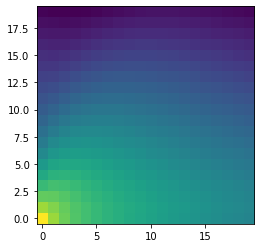

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.log10(P).T)
plt.gca().invert_yaxis()

## Inference

The implementation has a driver function. The driver is intended to be run from the command line, and pointed to an input script that defines the search parameters. If the driver is run in notebook, it outputs figures with gene count summaries.

The driver inputs a text file with parameters. The most salient ones are:


* `loom_filenames`: which `loom` files to fit? If multiple dataset names are listed, the process collects genes that are retained after filtering in *all* datasets. The specific file to analyze is indicated by the zero-indexed entry `IND`.
* `phys_lb` and `phys_ub`: what are the lower and upper bounds on $\log_{10}$ of the physical parameters $b$, $\beta$, and $\gamma$ = burst size, splicing rate, and degradation rate? Note that the rates are normalized to burst frequency $k_i$.
* `samp_lb` and `samp_ub`: what are the lower and upper bounds on $\log_{10}$ of the sampling parameters $C_u$ and $\lambda_s$? These parameters are scanned on a grid of dimensions `n_pt1`$\times$`n_pt2`.


In [ ]:
!cat loom_fbc/example_input.txt

#Parameter input for CME inference 
dataset_directory : ./loom_fbc/ : folder with dataset loom files
result_directory : ./ : where to put the result folder
loom_filenames : pbmc_1k_fbc : filenames to integrate
transcriptome_filename : gg_200525_genome_polyA_cum_3 : transcriptome location
polyA_threshold : 15 : minimum polyA count to use for sampling function
transcriptome_ind : 0 : column of transcriptome file to use (lengths if 0, polyA count if 1)
filter_param : 0.01, 0.01, 350, 350, 3, 3 : min threshold for mean, max threshold for max, mean threshold for max; odd is U, even is S
all_prev_results : : result files with gene names to exclude
attribute_names : [['spliced','unspliced','Gene','CellID']]*2 : list or list of lists with loom attribute names
gene_sel_seed : 123 : gene selection seed
n_gen : 100 : number of genes to select
IND : 0 : loom_filename to analyze
gene_list : : set of result files to import to define gene names
phys_lb : -1, -1.8, -1.8 : log10 of lower bound on burst

Run the inference workflow. This will input the `loom` file, select genes with moderate expression (dark gray in second figure), and select a subset of those to fit (blue in second figure).

Each run creates a directory with the date and metadata (dataset name, grid size, number of genes). Some metadata can be defined in the input text file. The grid scan runs in parallel. The procedure is stable for searches with a lot of genes and grid points: if the algorithm halts, the intermediate results are stored.

The directory contains files for each grid point, a `metadata` file that defines the search parameters, a `nosamp` file with results for the noise-free fit, and a `result` file that bundles all results together and can be imported for further analysis.

['./loom_fbc/pbmc_1k_fbc.loom']
Beginning preprocessing routine:
Dataset: ./loom_fbc/pbmc_1k_fbc.loom
64792 features observed, 55712 match genome annotations. 52809 are unique. 
1305 cells detected.
24426 genes retained as high-expression.
2684 genes retained in loom structure based on filter.
Gene set size: 2684
-----------
100 genes selected.
Gene set selected!
Beginning search routine.
64792 features observed, 55712 match genome annotations. 52809 are unique. 
1305 cells detected.
Directory ./gg_220406_pbmc_1k_fbc_5x6_100gen_1 created; metadata written.
30 of 30 points to be evaluated.
Starting search...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


Parallelization done!


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


Runtime: 1.6 min.


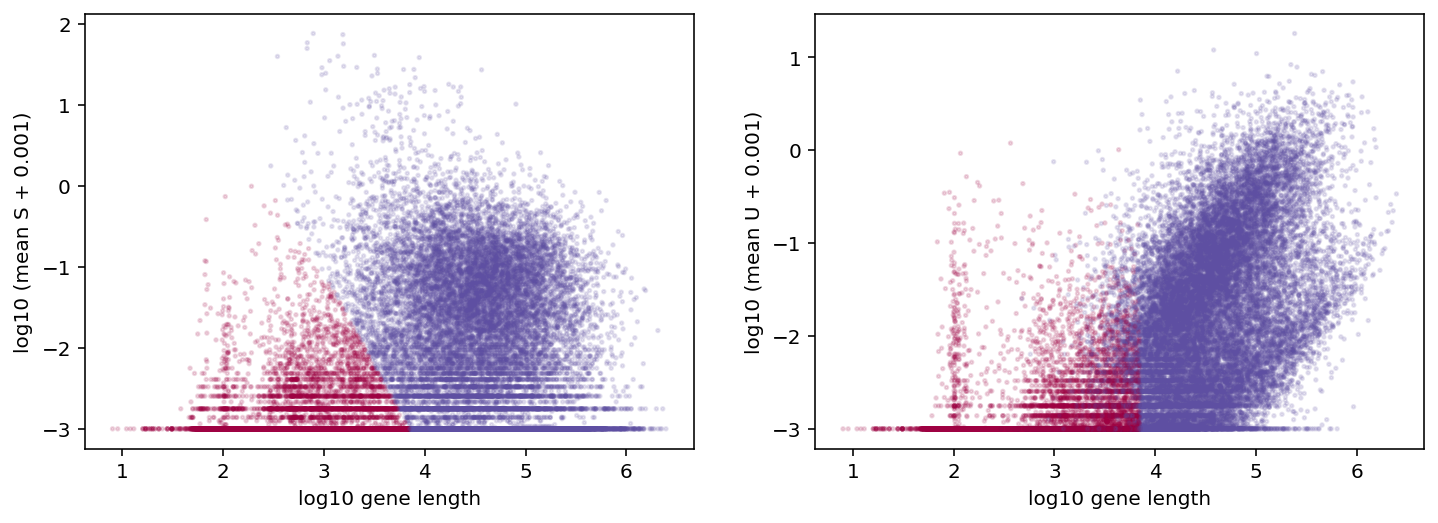

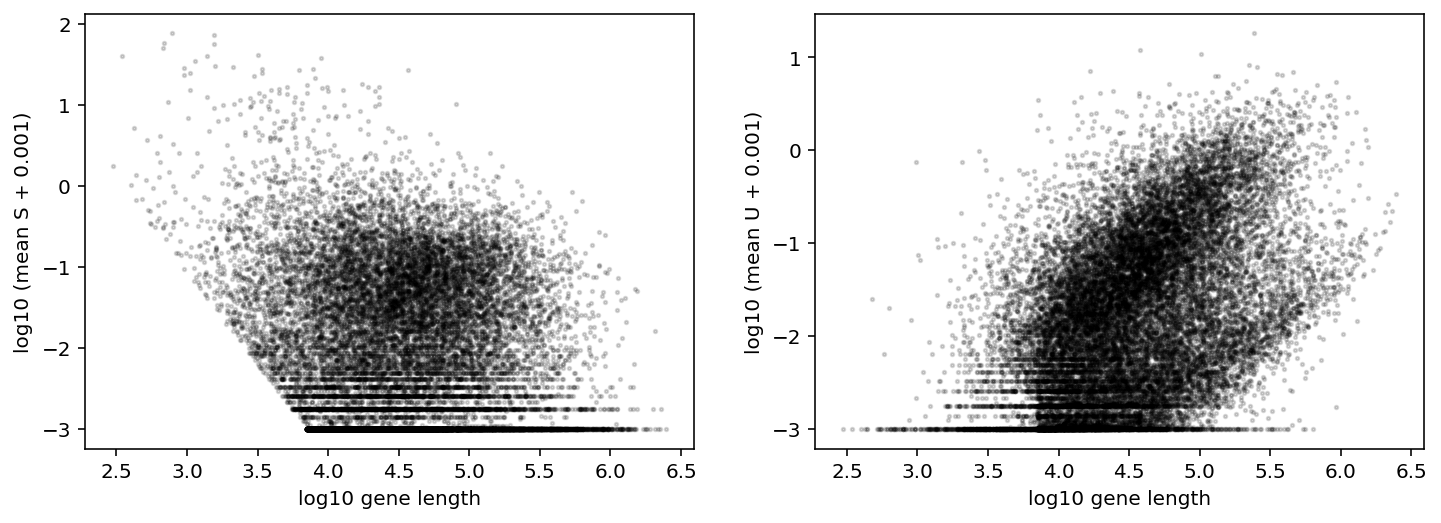

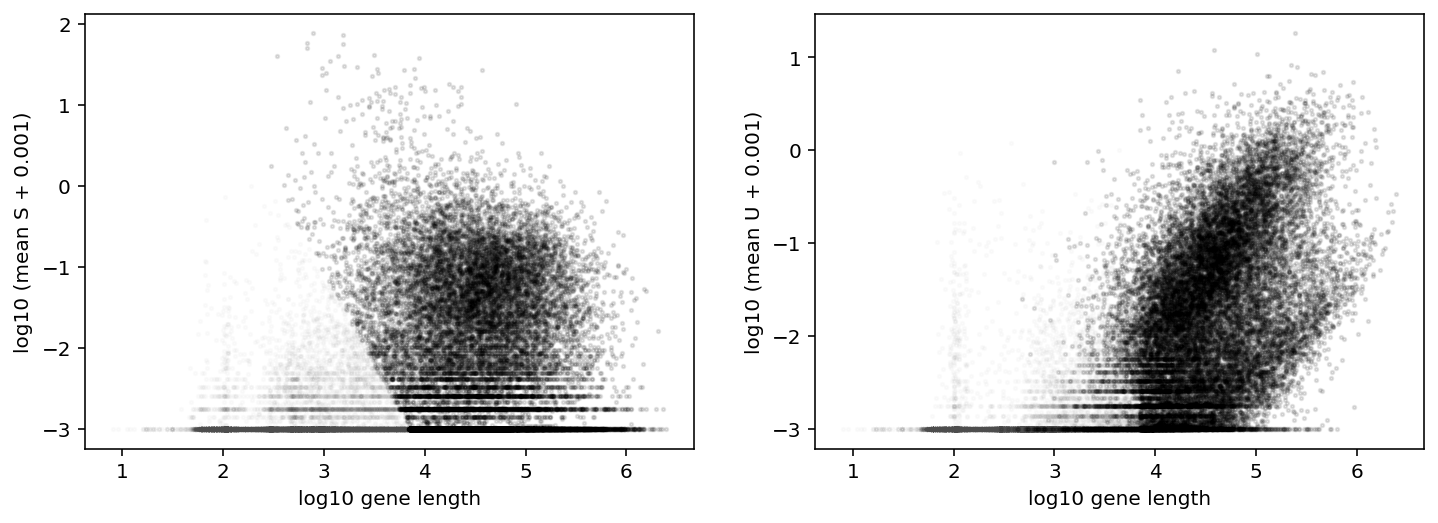

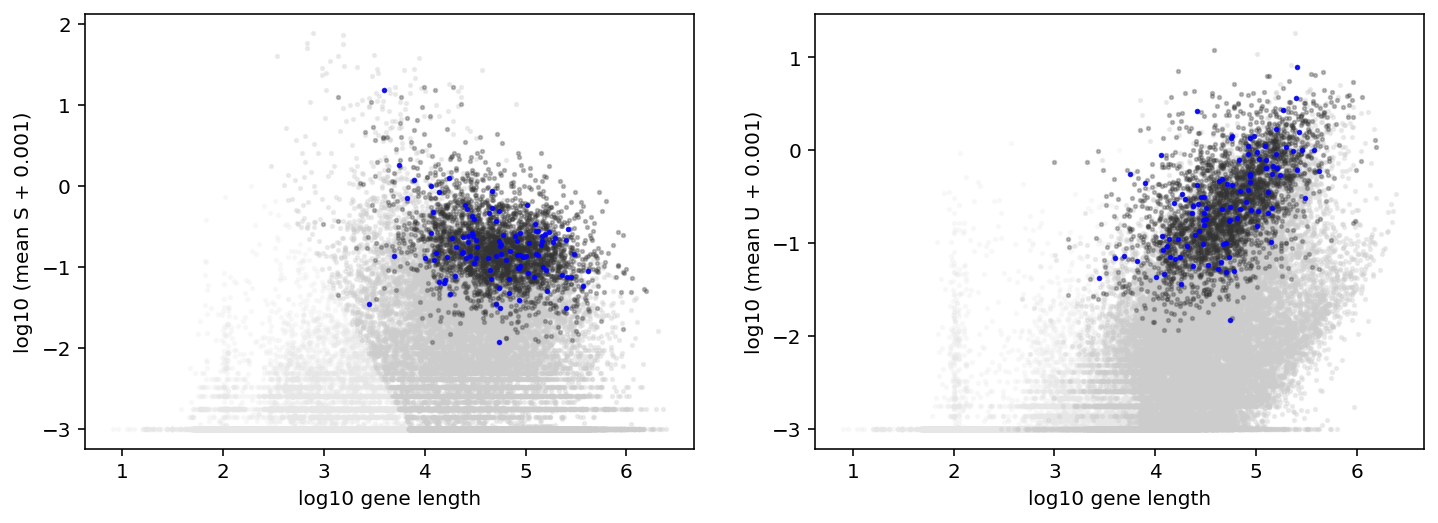

In [ ]:
inference_workflow('loom_fbc/example_input.txt')

## Result processing

### Data summary and exploration

Import the results. This interface can accept multiple inputs: for example, it's possible to use the same grid for searches over several sets of genes and integrate them in downstream analysis. The names of the strings in the list should be in the format `./result_dir/result.pickle`. 

In [ ]:
result_data = import_datasets(['./gg_{}_pbmc_1k_fbc_5x6_100gen_1/result.pickle'.format(date.today().strftime("%y%m%d"))])

Visualize the sampling parameter landscape. There is clearly an optimal basin in the $C_u, \lambda_s$ space, although the low resolution of the scan and the  number of genes make it challenging to identify it with much confidence.

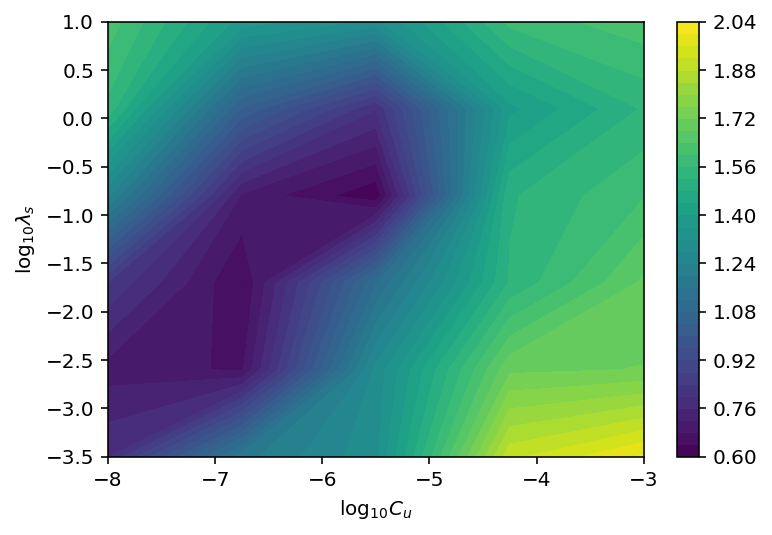

In [ ]:
landscape_viz(result_data)

Compute the best parameter tuple using simple total KL divergence minimization. 

In [ ]:
result_data.find_best_params()

In [ ]:
result_data.best_samp_params

(-5.5, -0.7999999999999998)

Test the stability of the parameter optimum under resampling. Essentially, we subsample sets of genes and see how the landscape and its optimum change. The basin appears to be robust and well-defined with as few as 20 genes.

In [ ]:
resamp_vec = np.array(np.linspace(0,result_data.n_gen,6)[1:-1],dtype=int)

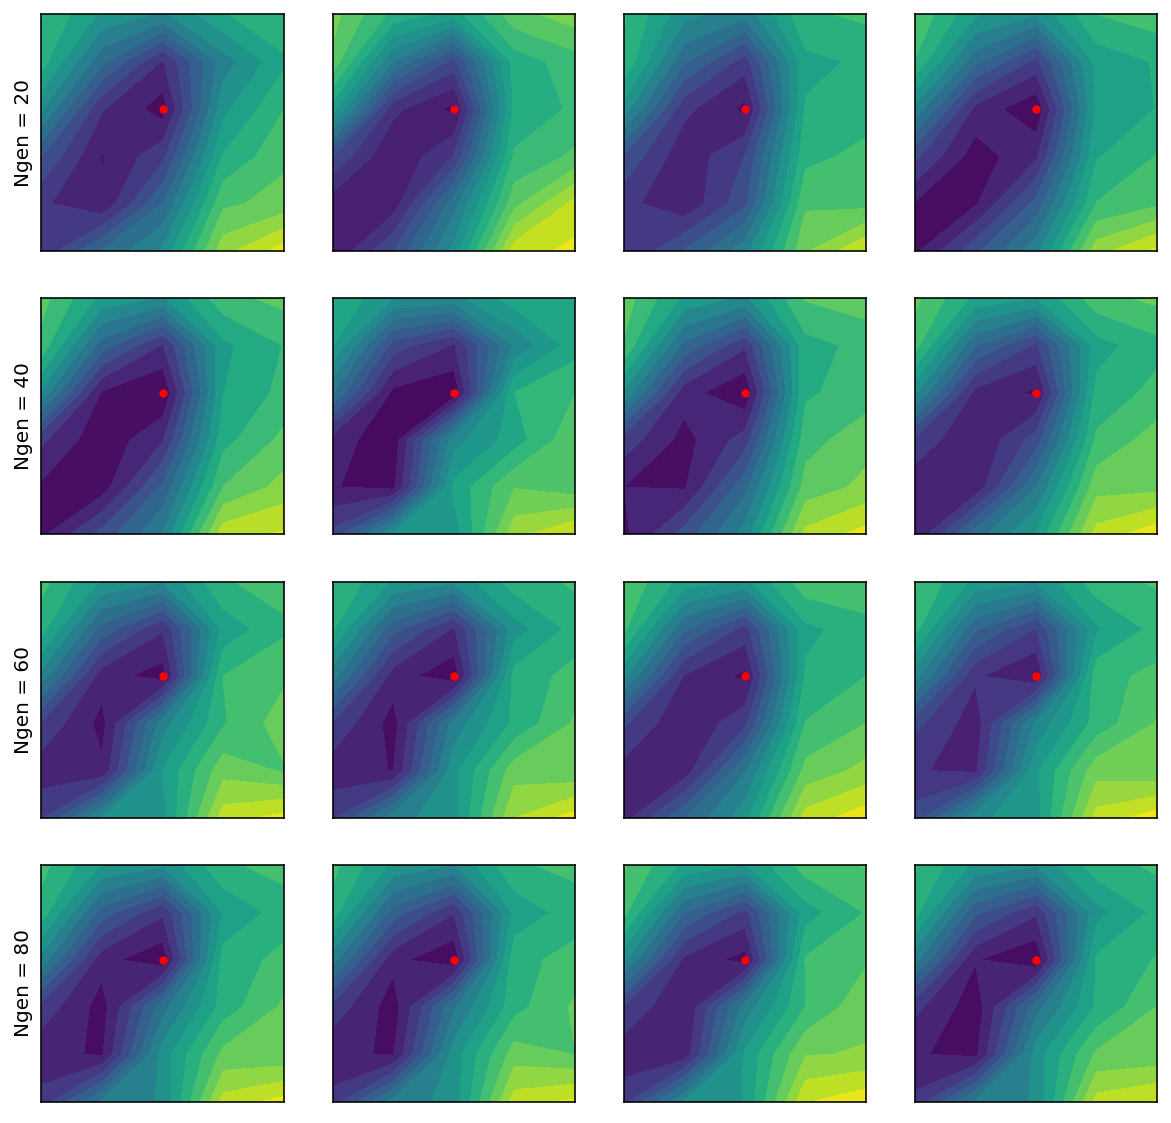

In [ ]:
resample_opt_viz(result_data,resamp_vec)

Summarize these findings by resampling 1000 times and plotting the locations of the optima.

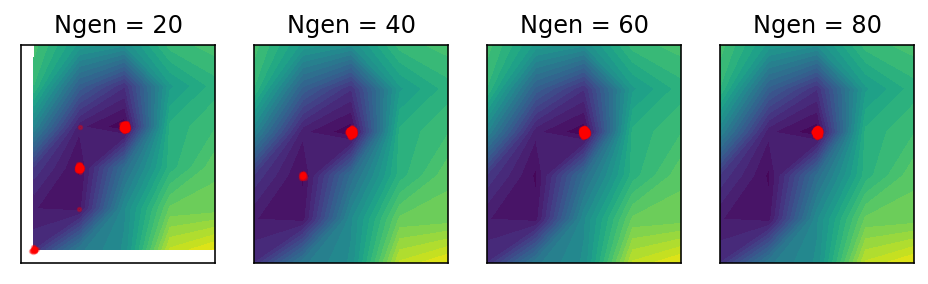

In [ ]:
resample_opt_mc_viz(result_data,resamp_vec)

Plot a normal-inverse Gaussian fit to the parameters, with and without sampling. The parameters clearly show quite a bit of skewness.

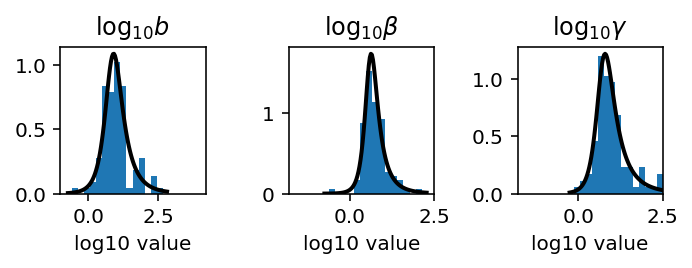

In [ ]:
from scipy.stats import *
plot_param_marg(result_data,fitlaw=norminvgauss)

Perform the same analysis on the noise-free results. The burst size parameters are shifted down by roughly an order of magnitude.

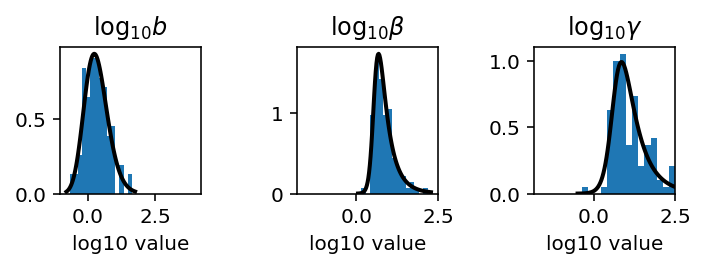

In [ ]:
plot_param_marg(result_data,nosamp=True,fitlaw=norminvgauss)

Examine length dependence (without error bars on maximum likelihood estimates). The full technical noise model does not appear to show much length dependence -- apart from, perhaps, a very modest decrease in burst size. The noise-free model shows that the burst size increases with length.

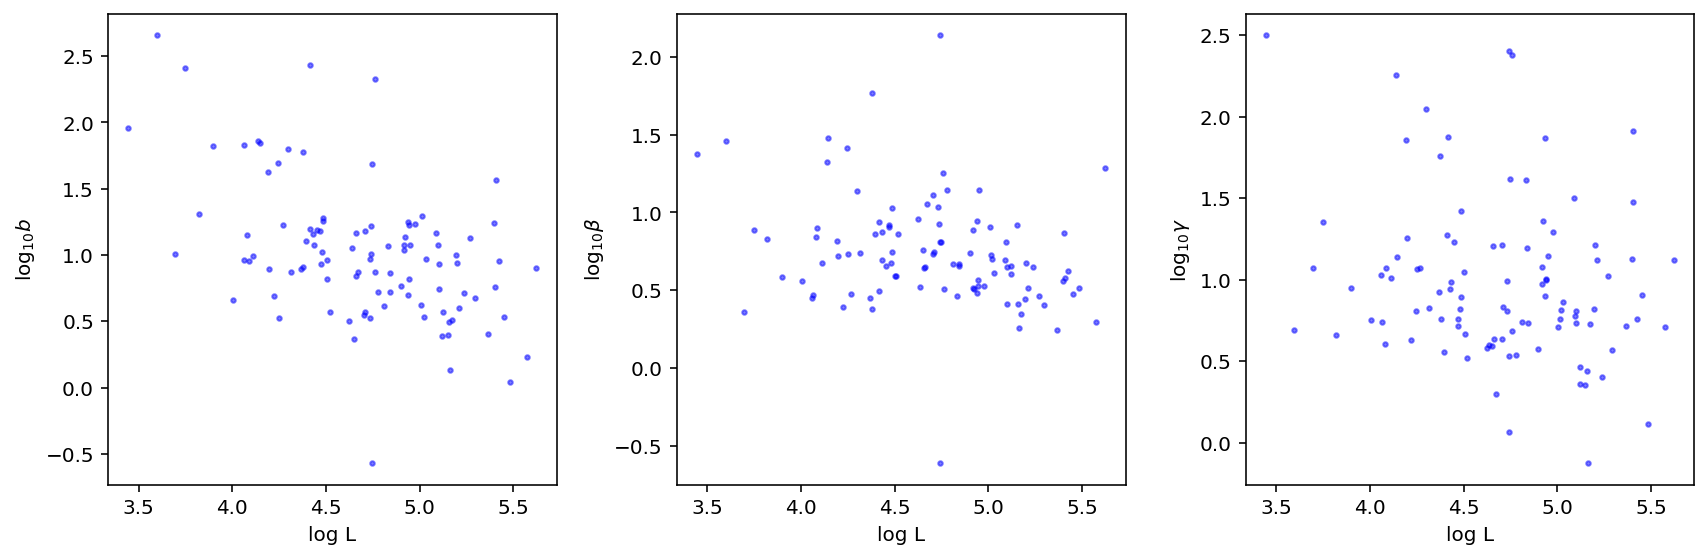

In [ ]:
plot_param_L_dep(result_data,plot_errorbars=False)

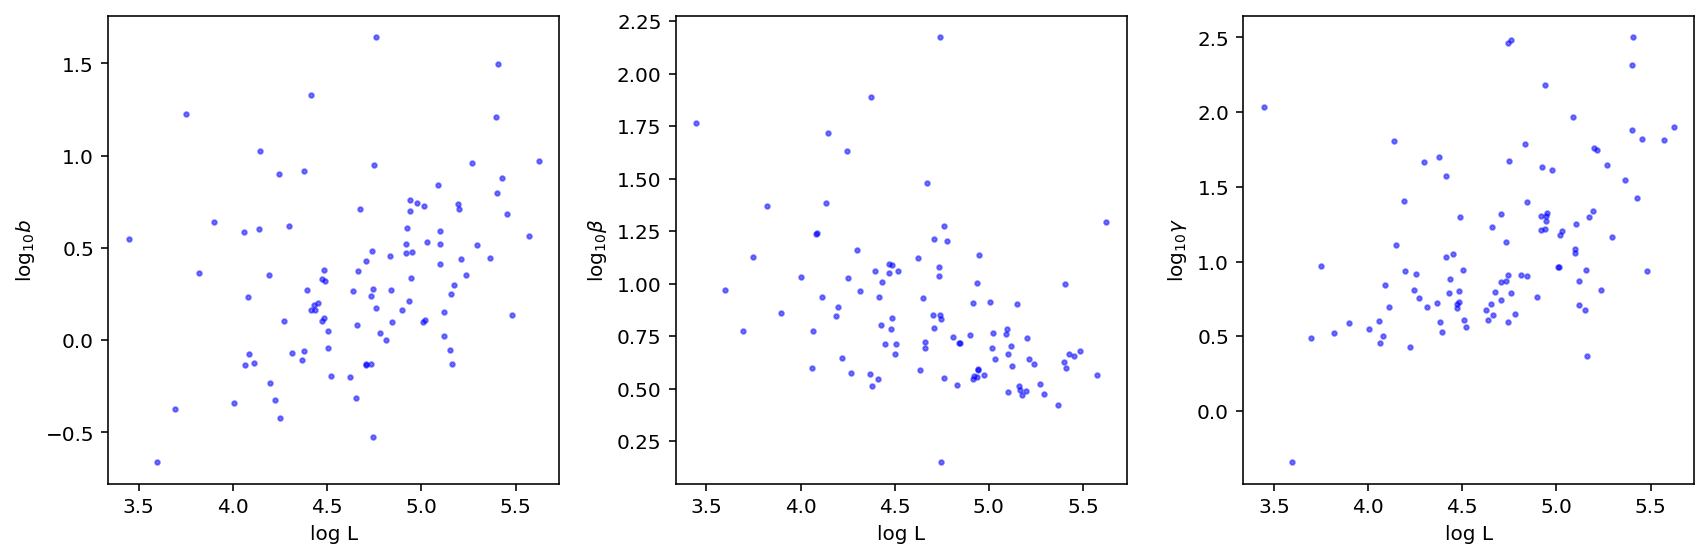

In [ ]:
plot_param_L_dep(result_data,plot_errorbars=False,nosamp=True)

### Fit quality analysis

Investigate the distribution of KL divergences at the optimal grid point. Only a few genes seem to have obviously poor fits (high KL divergence).

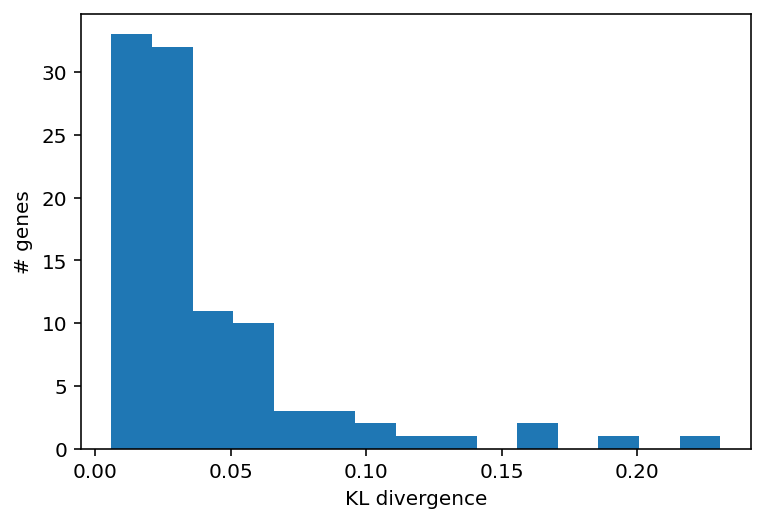

In [ ]:
plot_KL(result_data)

Compute the chi-squared statistic and $p$-values for all genes at the optimal grid point.

In [ ]:
(chisq,pval) = chisq_gen(result_data)

Is the $p$-value higher than 0.05/`n_gen`? The gene is retained. Lower? The gene is rejected due to potential model misspecification.

Output results of the chi-square test in an array corresponding to 1 = rejected, 0 = not rejected.


In [ ]:
sz = (10,10) 
figsize = (10,10)
title=True

In [ ]:
print(np.array(np.reshape(result_data.gene_rej,sz),dtype=int))

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
print(str(np.sum(result_data.gene_rej))+' genes of '+str(result_data.n_gen)+' have been rejected by chi-square.')

2 genes of 100 have been rejected by chi-square.


Compare the actual raw data to the fits (points: raw data, contour plot: theoretical PMF). The fits seem to accurately reconstruct the molecular distributions. The rejected genes are HSPD1, ATRX, SLU7, COPE, and TCF4.

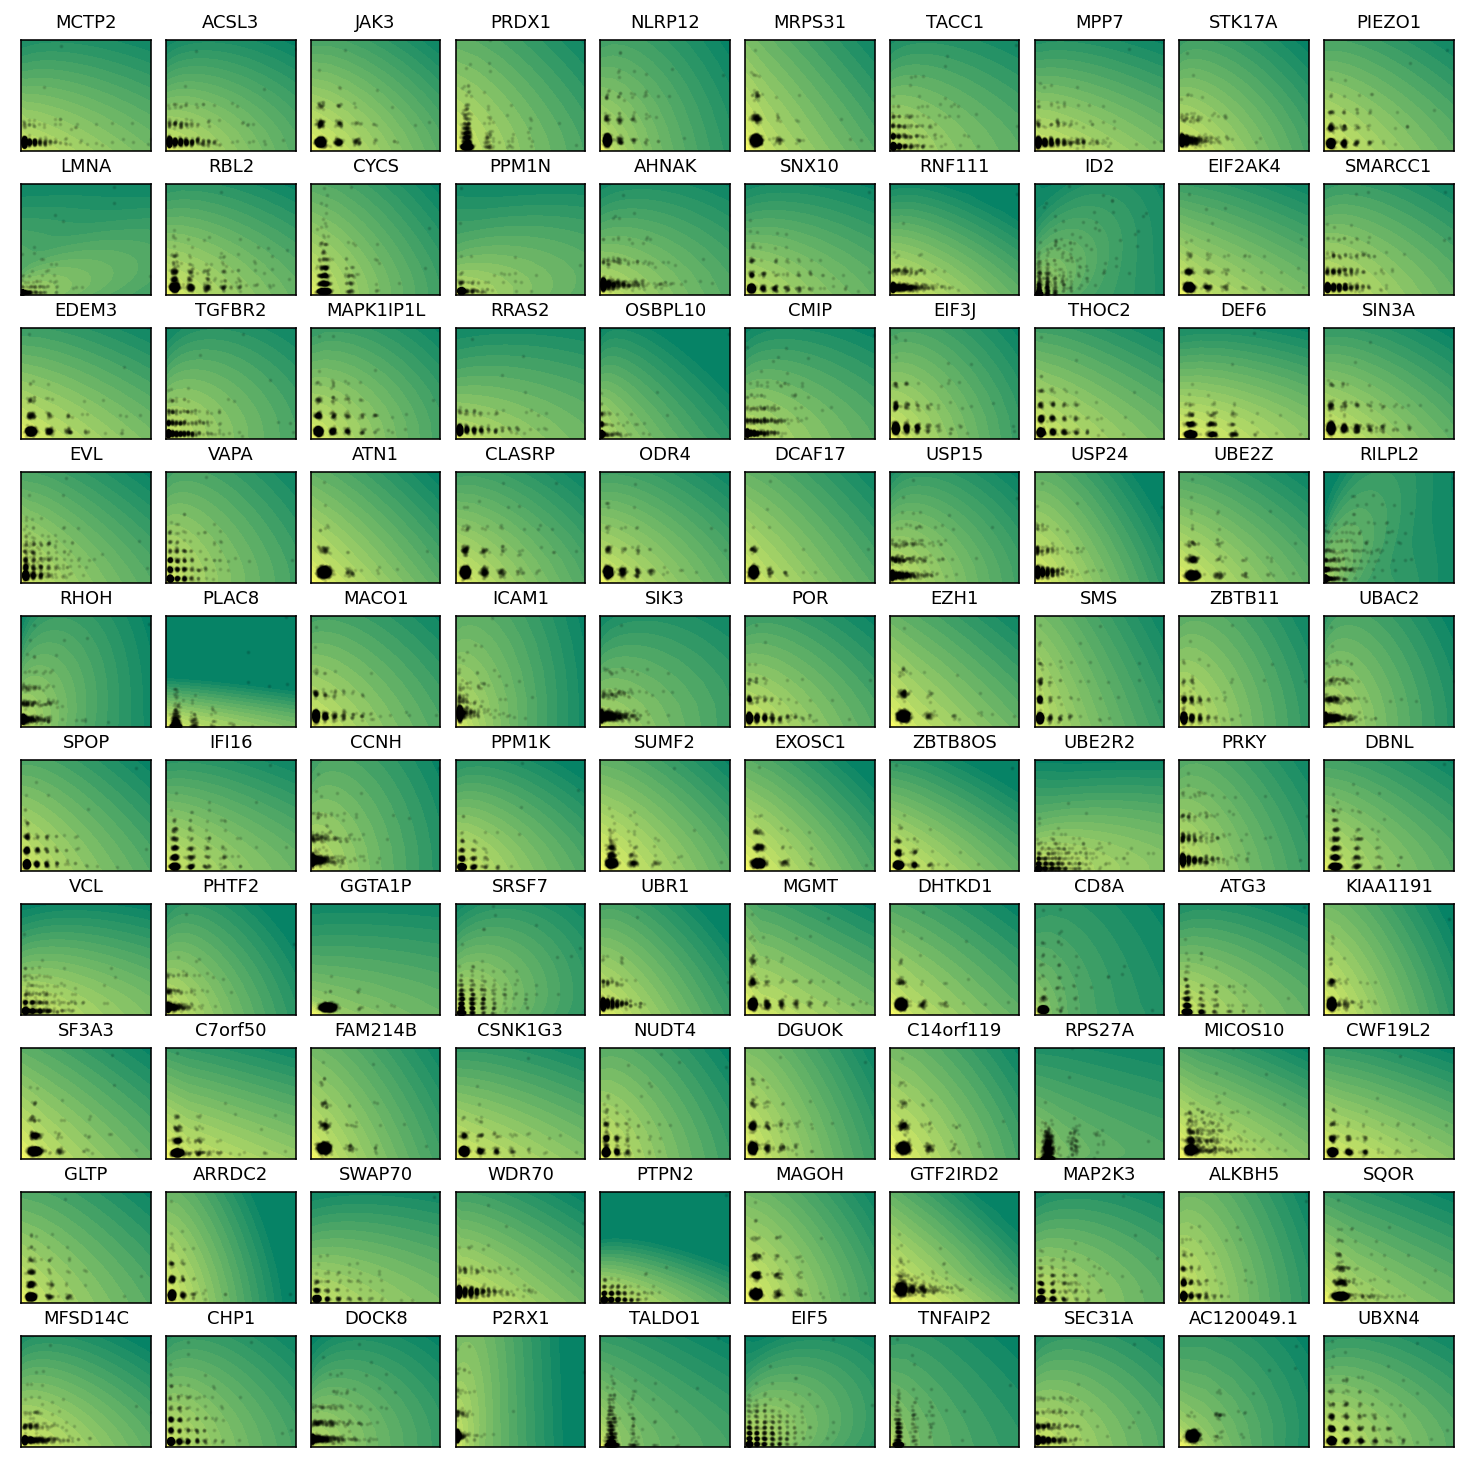

In [ ]:
plot_genes(result_data,sz,figsize,'none',log=True,title=title)

Plot the marginals. Again, the fits appear to be fairly good, although the data are sparse. Note the relatively poor fit to COPE, which supports the choice to reject.

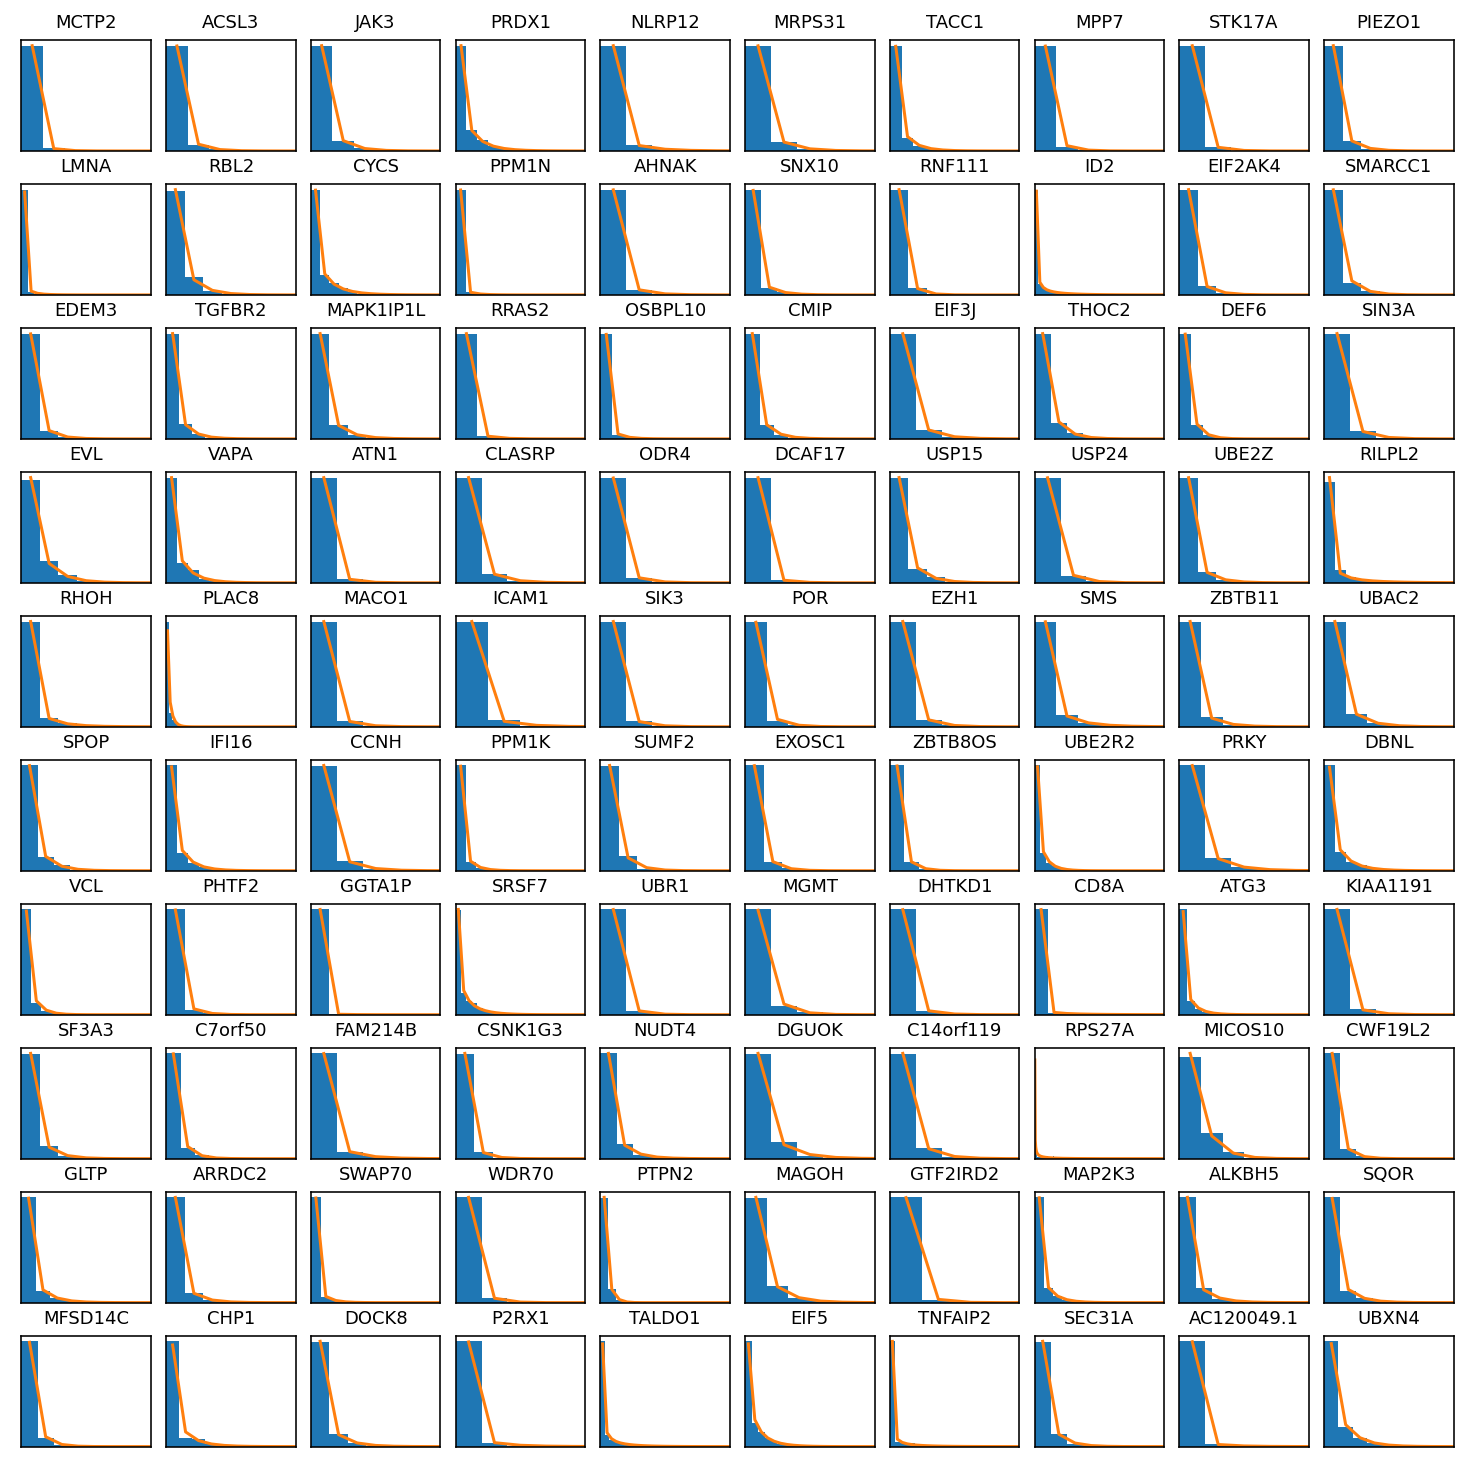

In [ ]:
plot_genes(result_data,sz,figsize,'mature',log=False,title=title)

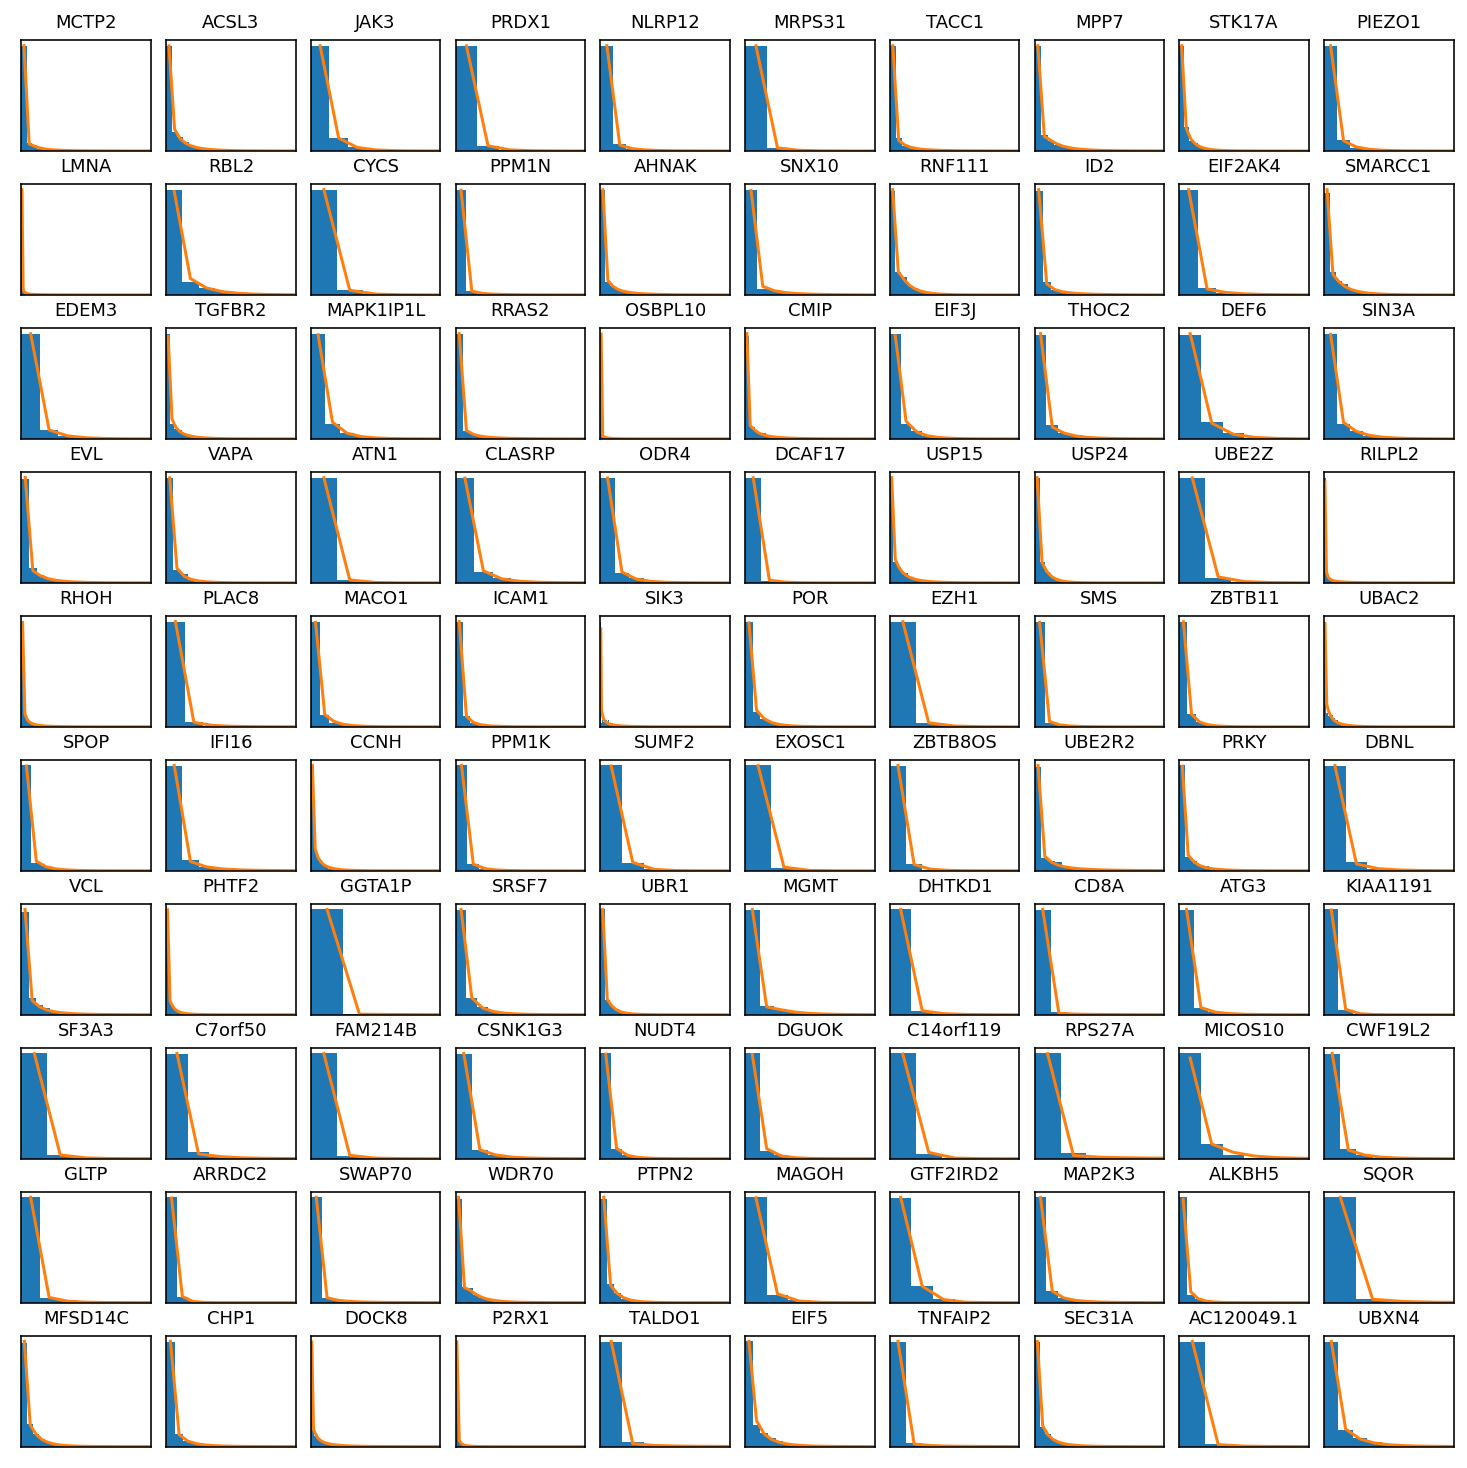

In [ ]:
plot_genes(result_data,sz,figsize,'nascent',log=False,title=title)

Test the stability of the optimum under self-consistent chi-squared testing: reject five genes, recompute the optimum based on all others, repeat. The optimum does not move.

(-5.5, -0.7999999999999998)

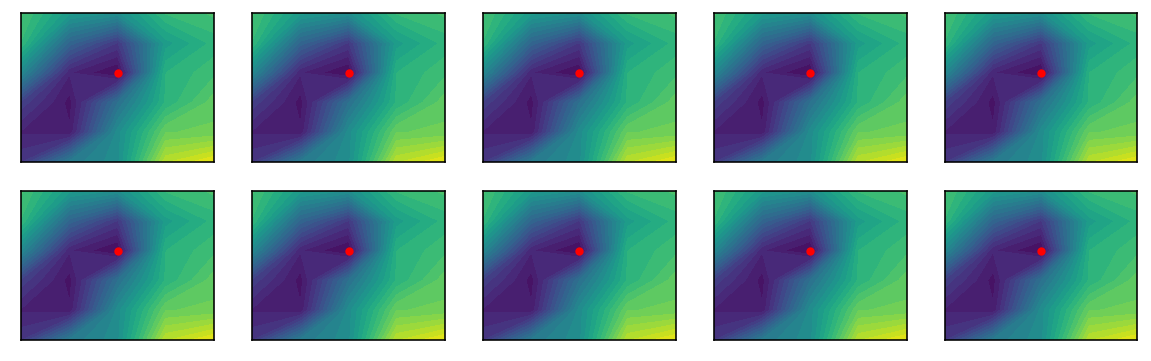

In [ ]:
chisq_best_param_correction(result_data,overwrite=True)

###Confidence interval construction

Compute conditional 99% confidence intervals for MLEs at the optimal grid point. These are fairly narrow, as there are a lot of cells. The genes rejected by the chi-squared test are excluded. We also plot a linear fit to the parameter trends, computed using weighted linear least squares. 

In [ ]:
compute_sigma(result_data)
compute_sigma(result_data,nosamp=True)

/content/seq_cme_inference.py:383: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


Parameter set 87 gives negative stdev; replaced with mean. (Search converged to local minimum?)
Parameter set 78 gives negative stdev; replaced with mean. (Search converged to local minimum?)


/content/seq_cme_inference.py:383: RuntimeWarning: invalid value encountered in sqrt
  errorbars[i,:] = c*np.sqrt(np.diag(hess_inv))/np.sqrt(result_data.Ncells)


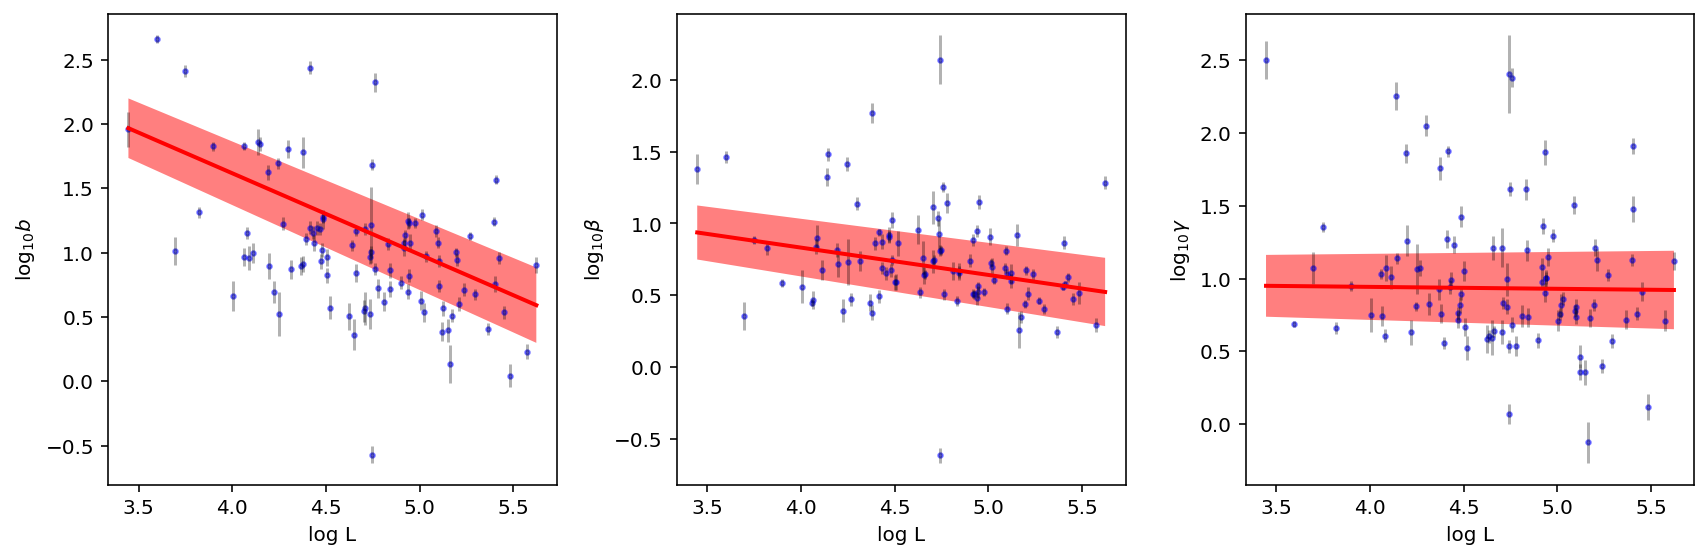

In [ ]:
plot_param_L_dep(result_data,plot_errorbars=True,chisq_correct=True,nosamp=False)

We repeat the procedure for the noise-free fit.

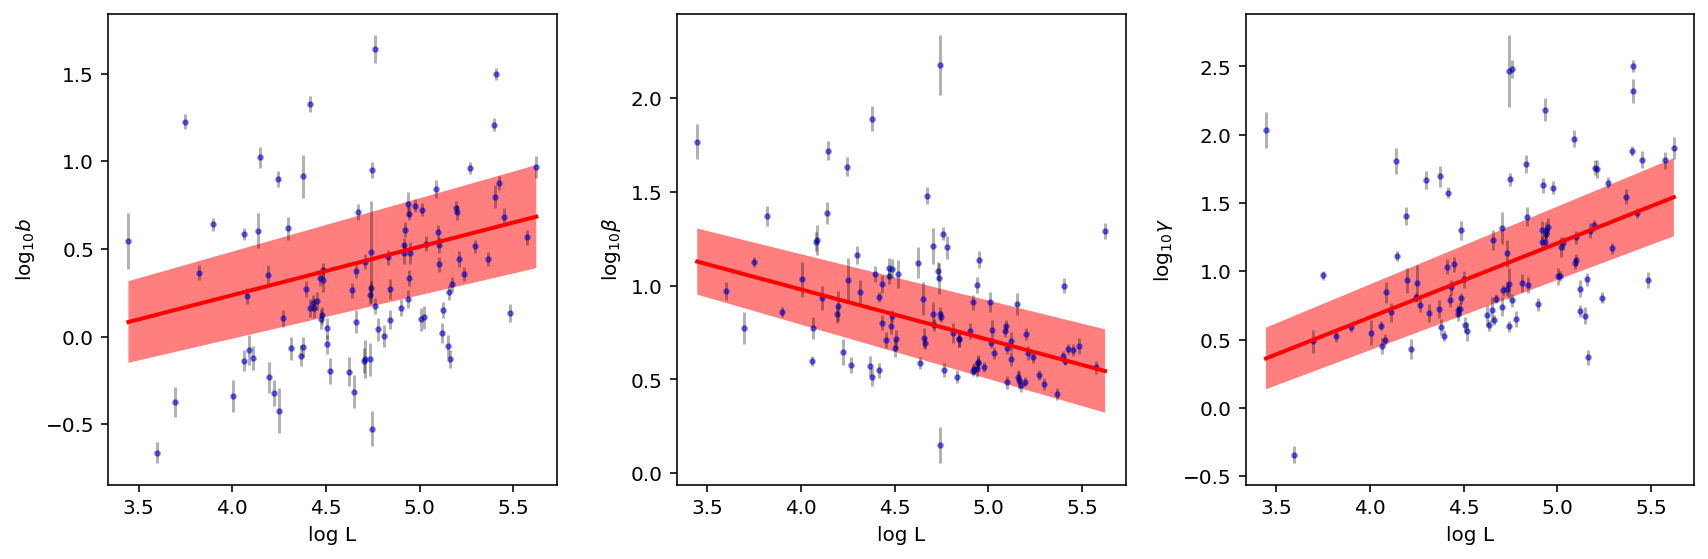

In [ ]:
_=chisq_gen(result_data,nosamp=True)
plot_param_L_dep(result_data,plot_errorbars=True,chisq_correct=True,nosamp=True)

In [ ]:
dt = time.time()-t1
print('{:.0f} seconds elapsed.'.format(dt))

332 seconds elapsed.
